In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor

import math
import numpy as np

from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import random

from pathlib import Path

## Set path to dir with model projects

In [2]:
projects_path = Path("/home/falaxdb/Repos/minus1/transformer_decoder_training/saved_files/saved_models")

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

dataset_dir = "/home/falaxdb/Repos/minus1/datasets/maestro_v3_split/hands_split_into_seperate_midis"

import transformer_decoder_training.training_helper_functions as helper

Processed dataset (1038/1038): 100%|██████████| 1038/1038 [00:14<00:00, 70.87it/s]


Processed 1038 of 1038 files
The train loader has 564 batches with a size of 32
The model is trained on approximately 18048 sequences
Initializing Custom music theory Loss with alpha=1 and beta=1
Start training Model with following parameters:
model_project_name: transformer_3.1
model_params: 
  model_topology: Transformer(
  (embedding): Linear(in_features=24, out_features=256, bias=True)
  (pos_emb): SinusoidalPosEmb()
  (blocks): ModuleList(
    (0-3): 4 x TransformerBlock(
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=256, out_features=1024, bias=True)
        (1): ELU(alpha=1.0)
        (2): Linear(in_features=1024, out_features=256, bias=True)
      )
    )
  )
  (fc_out): Linear(in_fea

Epoch: 1, Train loss: 1.12488, Val loss: 1.16498, Epoch time = 20.561s


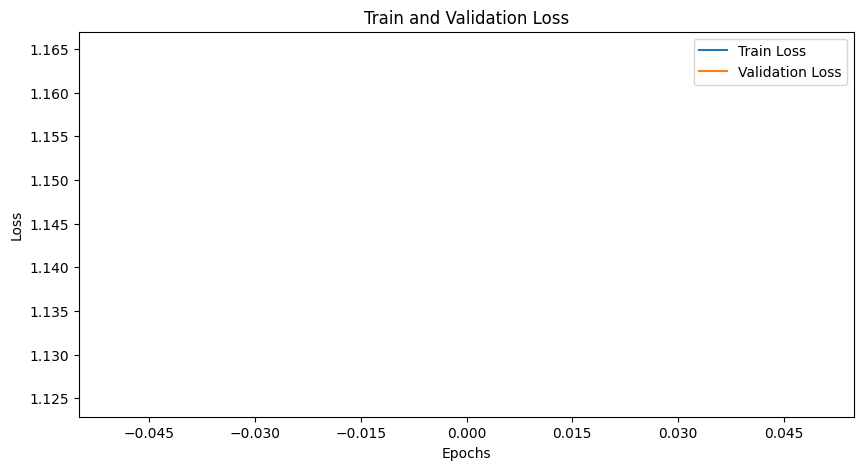

Epoch: 2, Train loss: 1.09231, Val loss: 1.16293, Epoch time = 20.013s


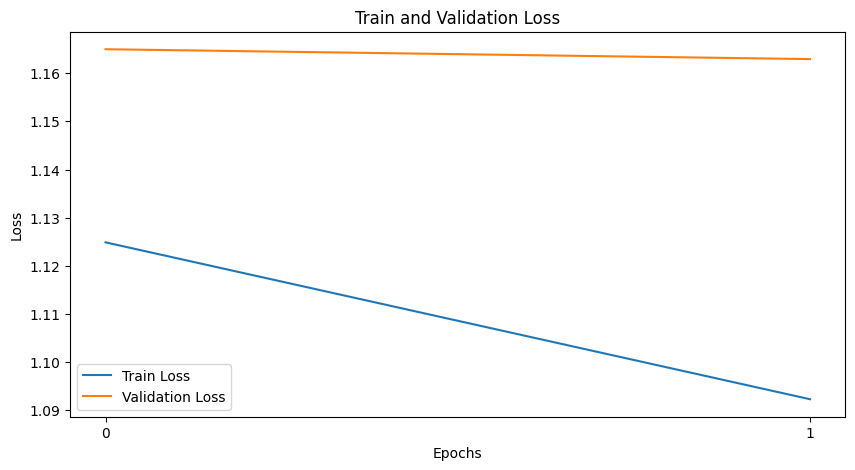

Epoch: 3, Train loss: 1.08911, Val loss: 1.15873, Epoch time = 18.533s


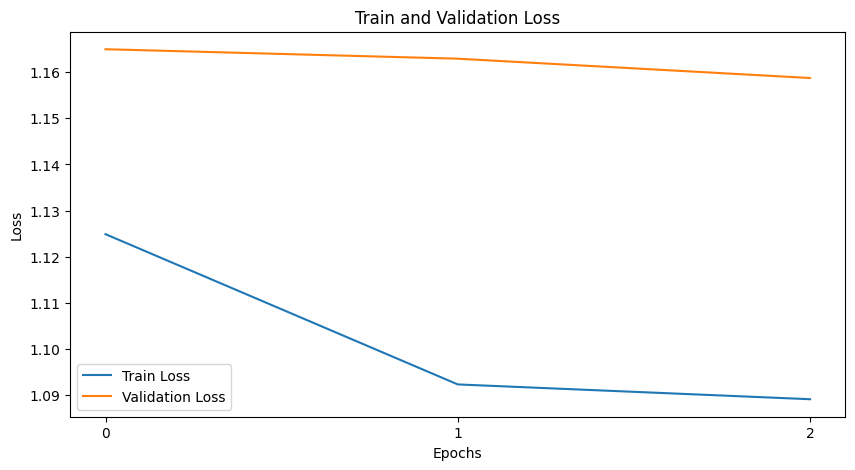

Epoch: 4, Train loss: 1.08656, Val loss: 1.15736, Epoch time = 18.155s


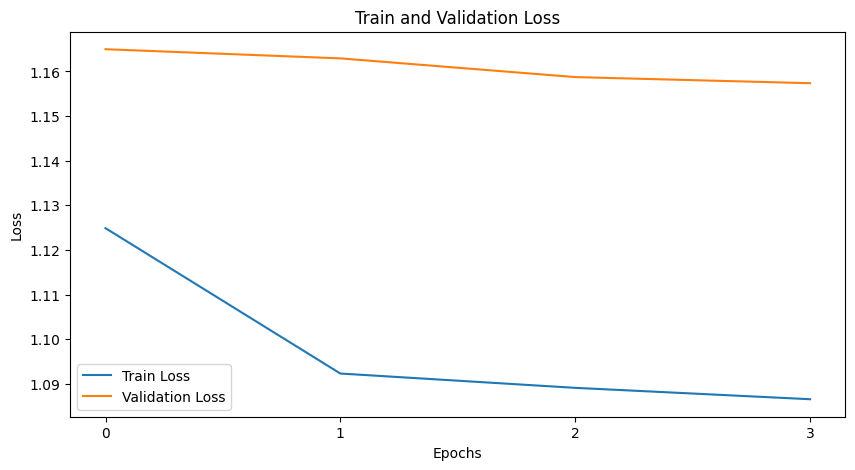

Epoch: 5, Train loss: 1.08502, Val loss: 1.15410, Epoch time = 18.189s


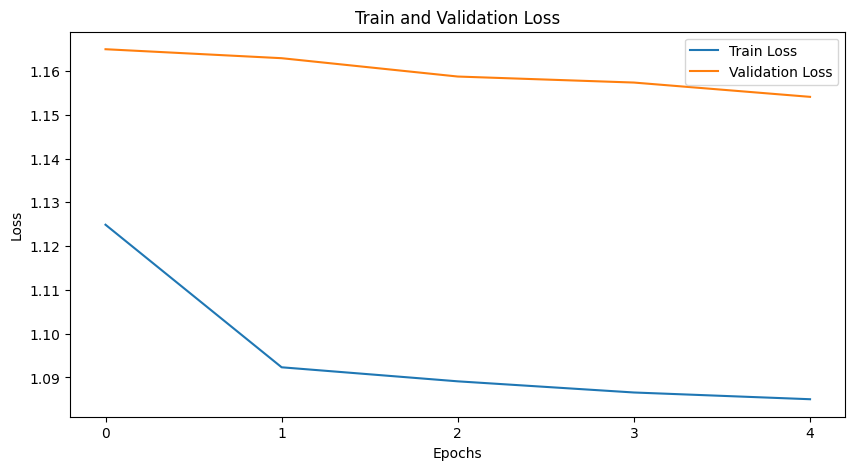

Epoch: 6, Train loss: 1.08392, Val loss: 1.15497, Epoch time = 18.120s


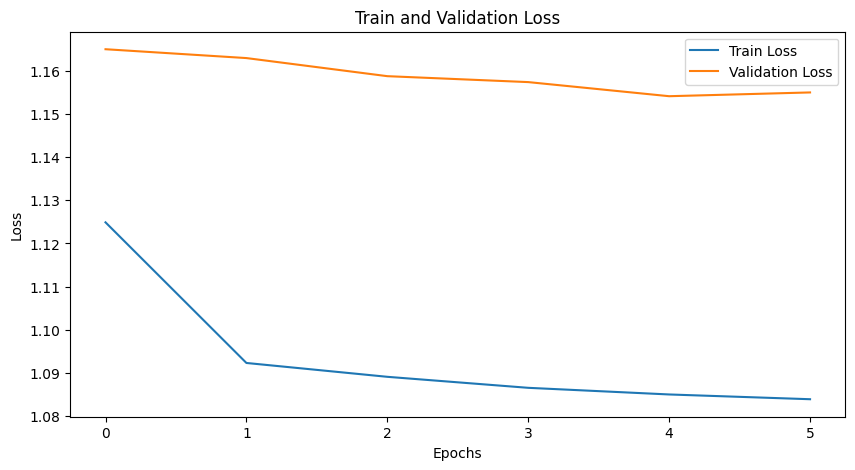

Epoch: 7, Train loss: 1.08274, Val loss: 1.15312, Epoch time = 17.982s


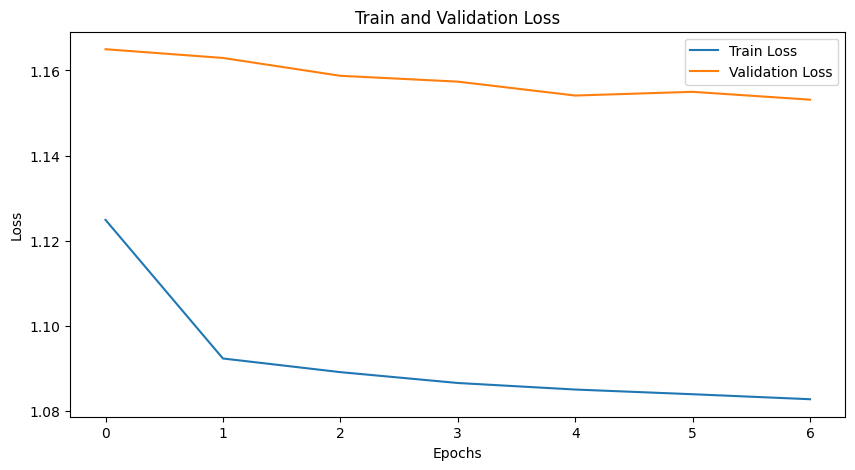

Epoch: 8, Train loss: 1.08166, Val loss: 1.15263, Epoch time = 18.190s


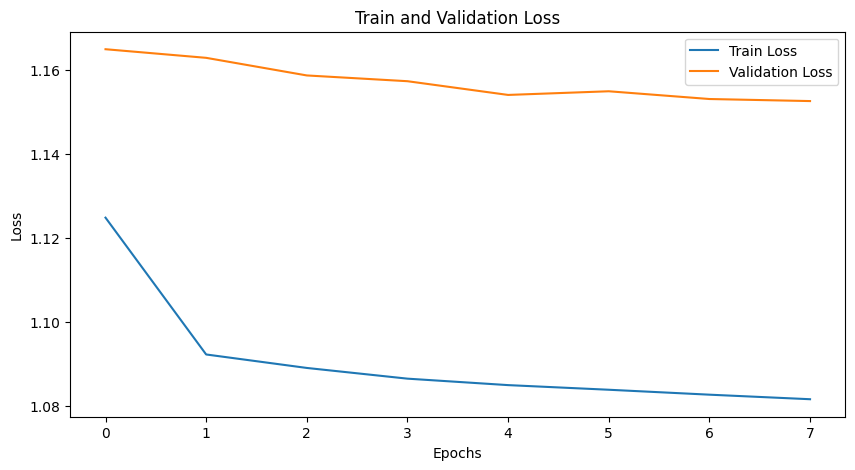

Epoch: 9, Train loss: 1.08056, Val loss: 1.15153, Epoch time = 18.274s


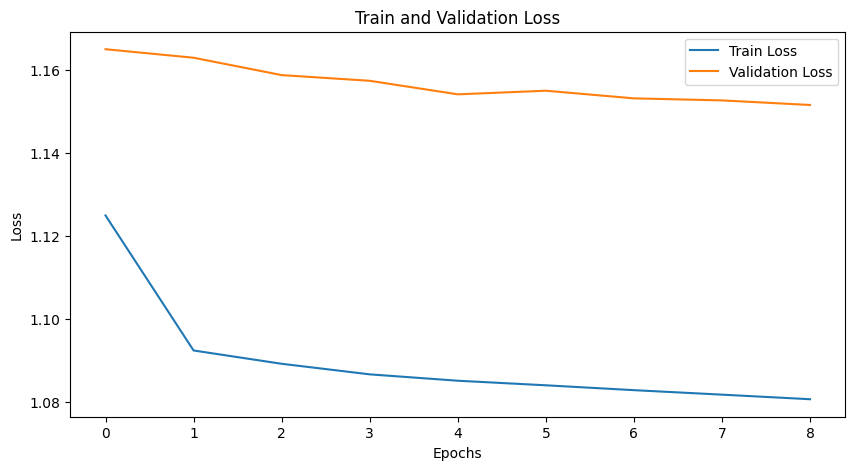

Epoch: 10, Train loss: 1.07940, Val loss: 1.15149, Epoch time = 19.489s


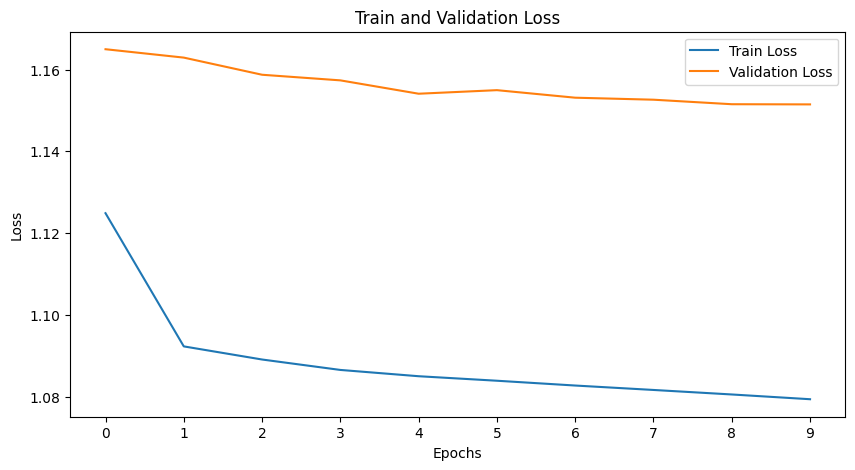

Epoch: 11, Train loss: 1.07828, Val loss: 1.14955, Epoch time = 20.140s


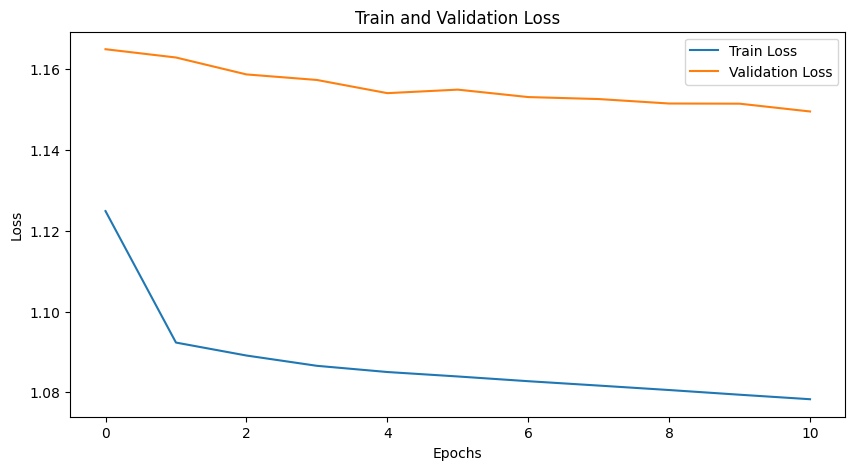

Epoch: 12, Train loss: 1.07746, Val loss: 1.14837, Epoch time = 19.940s


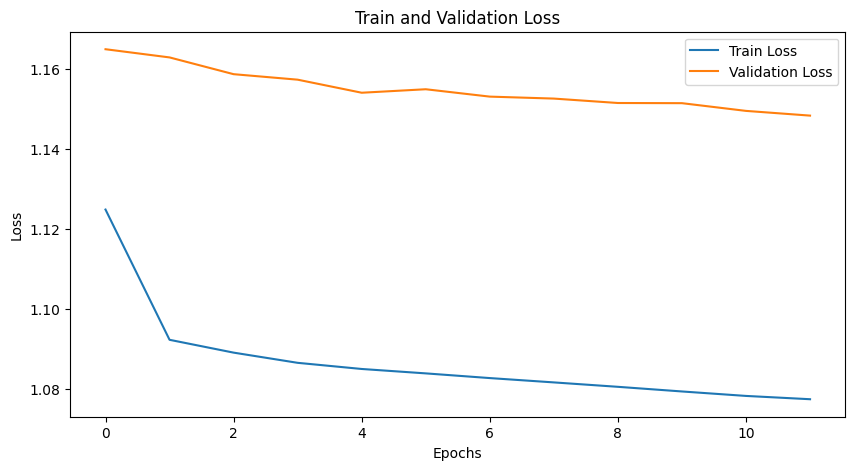

Epoch: 13, Train loss: 1.07679, Val loss: 1.14771, Epoch time = 19.602s


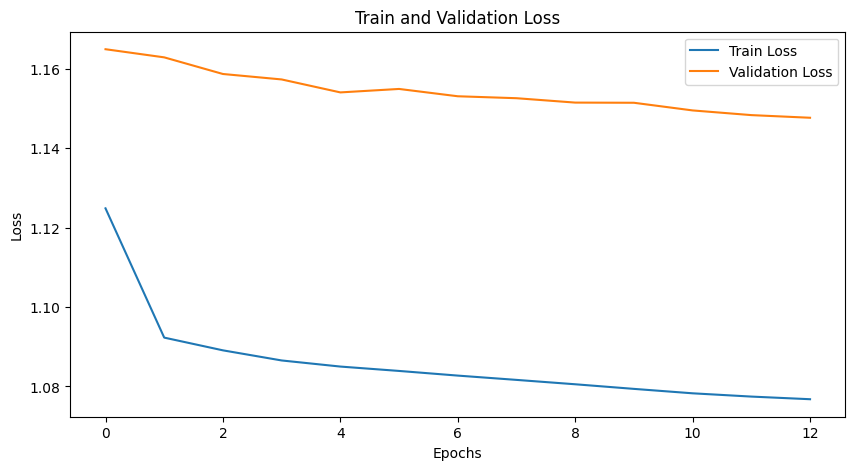

Epoch: 14, Train loss: 1.07579, Val loss: 1.14618, Epoch time = 19.057s


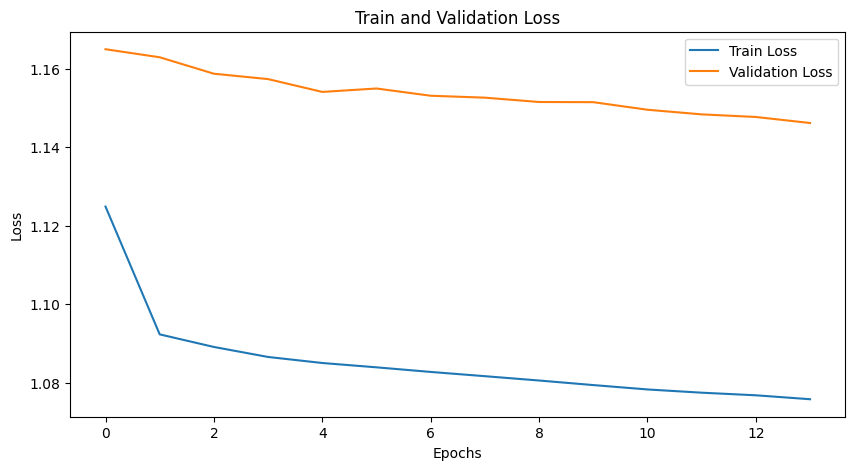

Epoch: 15, Train loss: 1.07488, Val loss: 1.14535, Epoch time = 18.722s


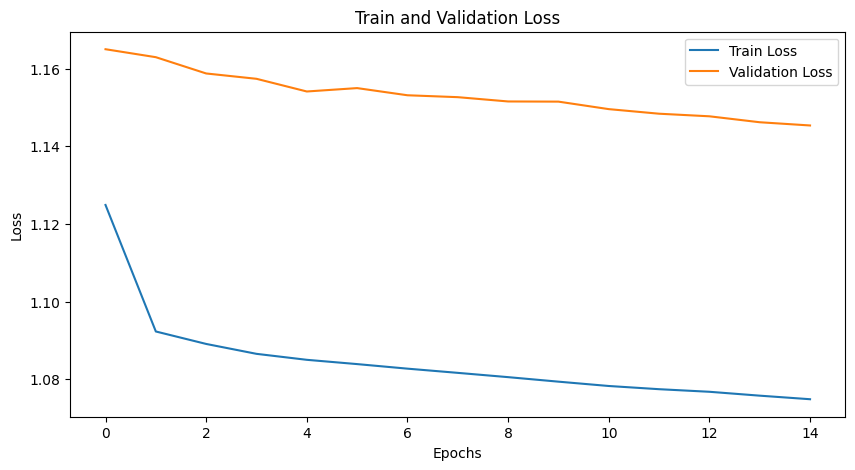

Epoch: 16, Train loss: 1.07407, Val loss: 1.14504, Epoch time = 18.240s


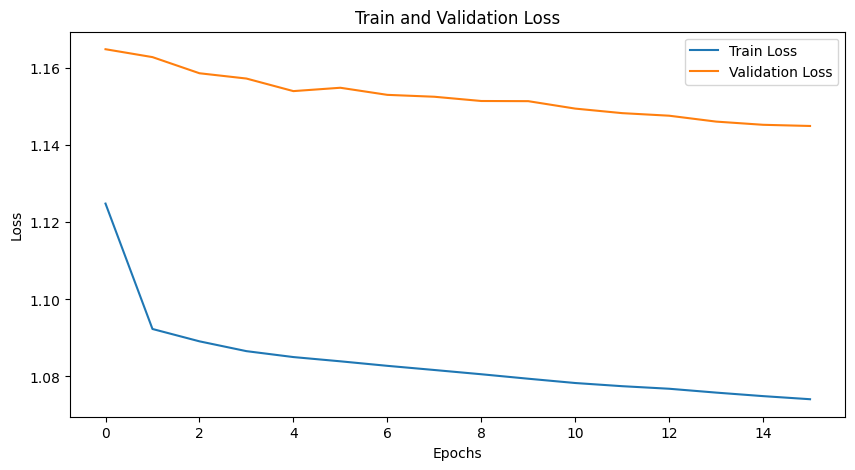

Epoch: 17, Train loss: 1.07367, Val loss: 1.14549, Epoch time = 18.114s


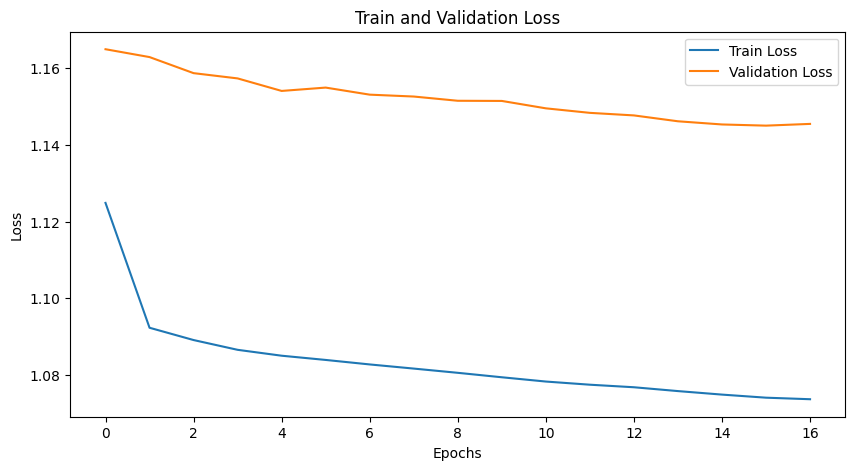

Epoch: 18, Train loss: 1.07296, Val loss: 1.14404, Epoch time = 18.782s


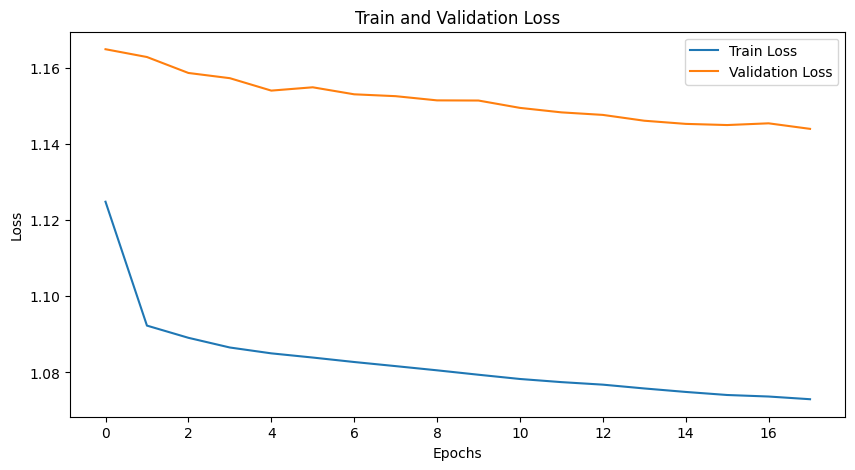

Epoch: 19, Train loss: 1.07248, Val loss: 1.14361, Epoch time = 18.312s


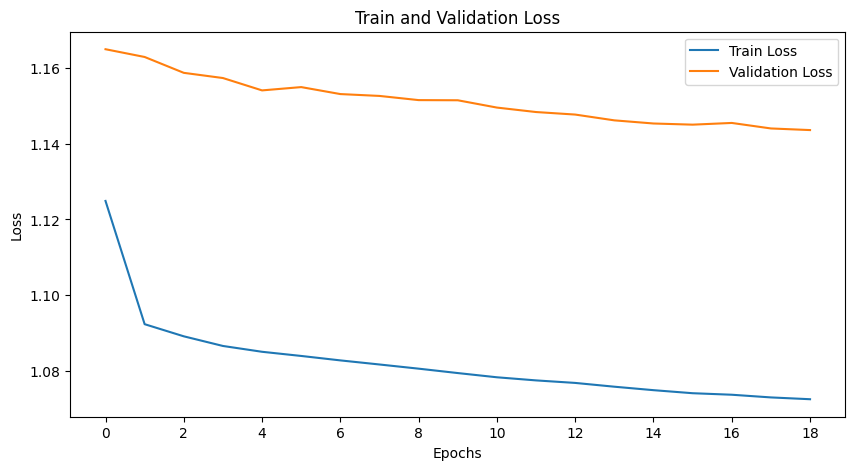

Epoch: 20, Train loss: 1.07200, Val loss: 1.14320, Epoch time = 18.607s


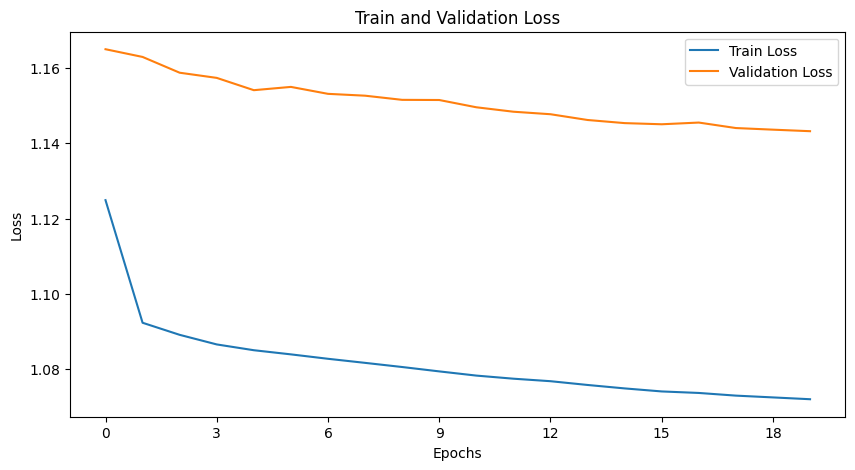

Epoch: 21, Train loss: 1.07152, Val loss: 1.14316, Epoch time = 18.689s


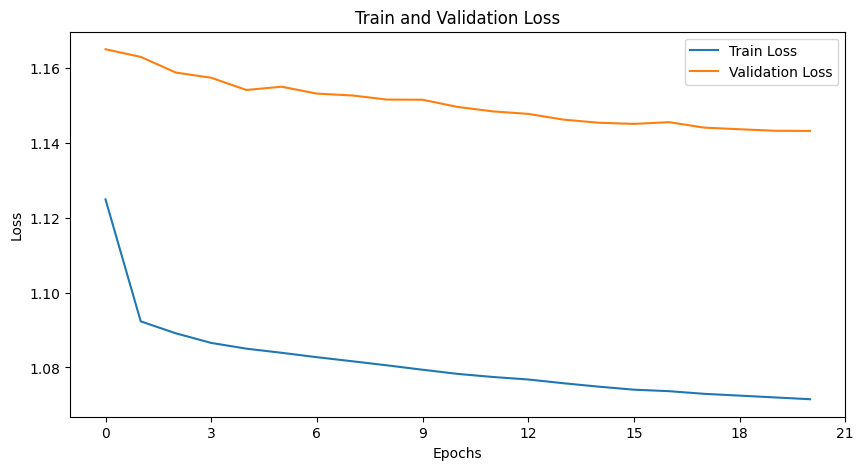

Epoch: 22, Train loss: 1.07092, Val loss: 1.14219, Epoch time = 18.381s


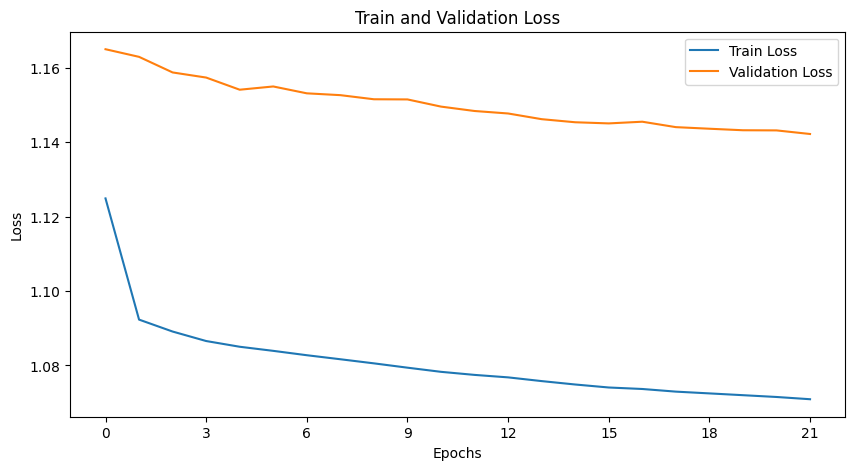

Epoch: 23, Train loss: 1.07039, Val loss: 1.14225, Epoch time = 19.892s


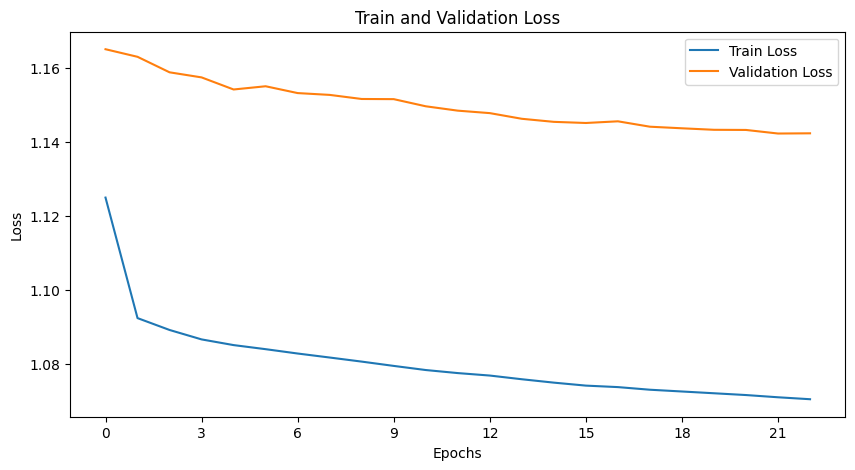

Epoch: 24, Train loss: 1.07025, Val loss: 1.14096, Epoch time = 20.089s


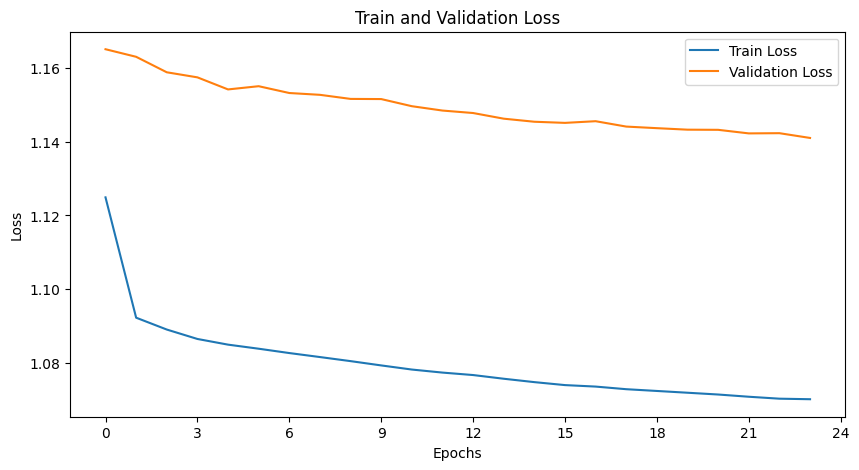

Epoch: 25, Train loss: 1.06970, Val loss: 1.14077, Epoch time = 19.093s


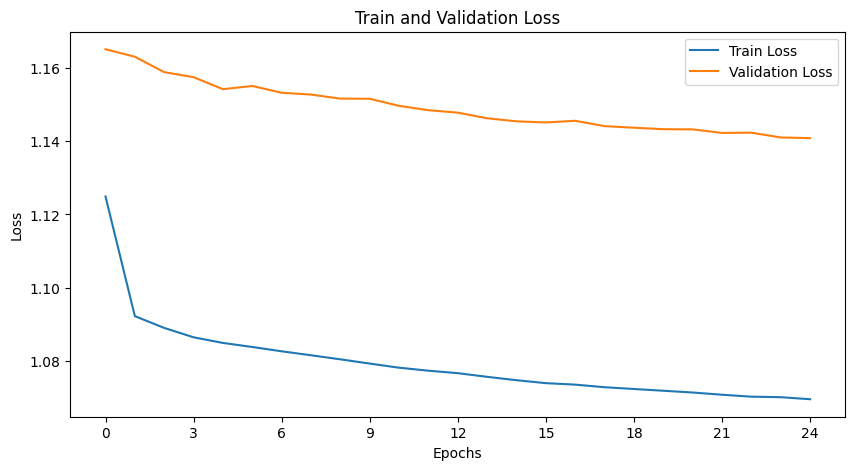

Epoch: 26, Train loss: 1.06933, Val loss: 1.14099, Epoch time = 19.261s


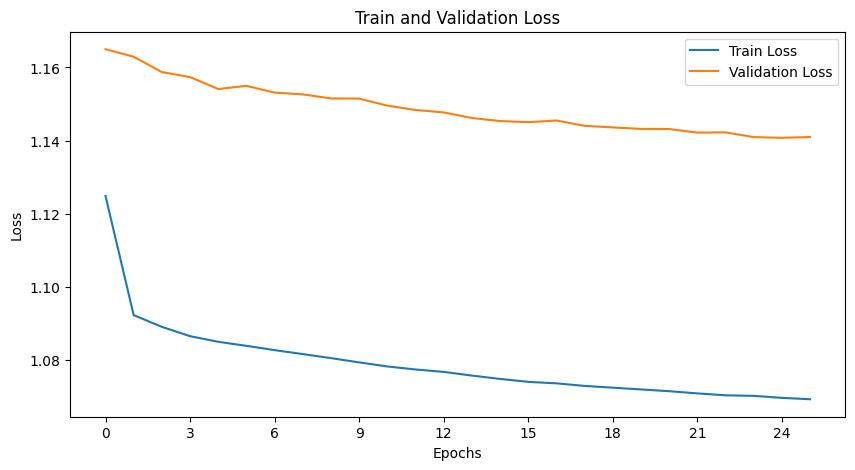

Epoch: 27, Train loss: 1.06889, Val loss: 1.14164, Epoch time = 19.003s


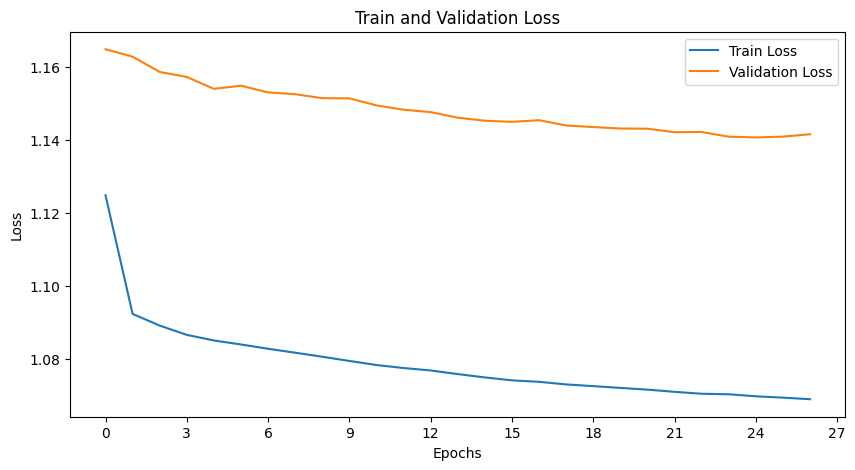

Epoch: 28, Train loss: 1.06876, Val loss: 1.14056, Epoch time = 18.938s


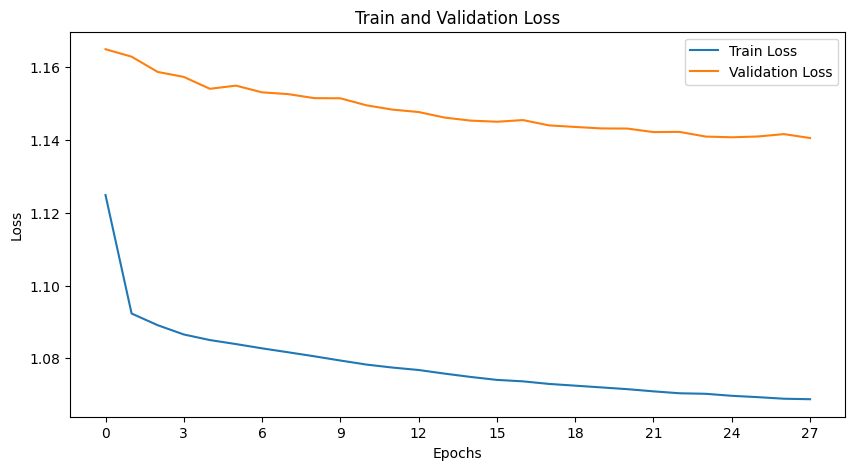

Epoch: 29, Train loss: 1.06828, Val loss: 1.14089, Epoch time = 18.362s


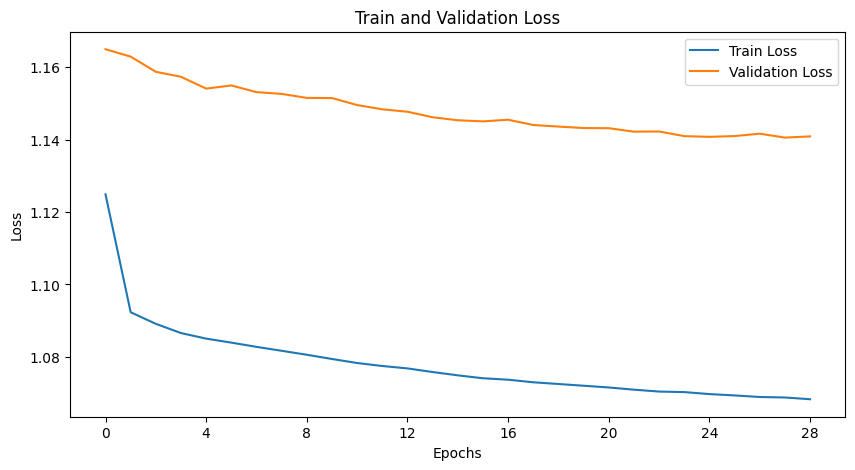

Epoch: 30, Train loss: 1.06795, Val loss: 1.13956, Epoch time = 18.194s


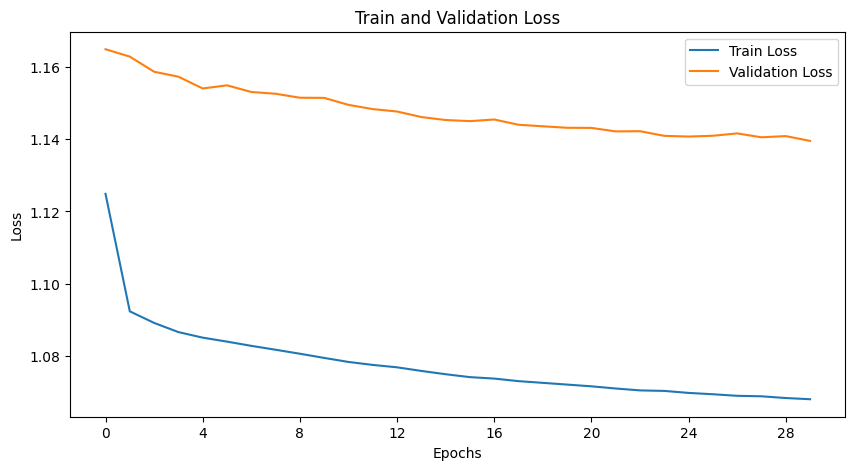

Epoch: 31, Train loss: 1.06794, Val loss: 1.13945, Epoch time = 18.514s


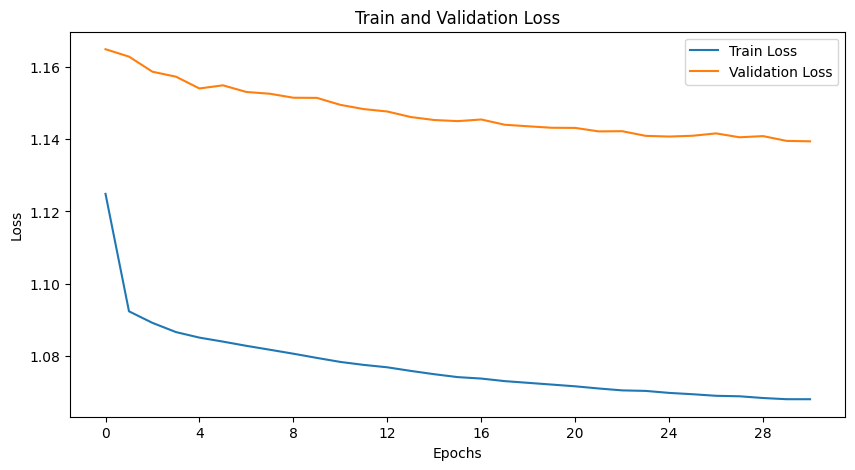

Epoch: 32, Train loss: 1.06762, Val loss: 1.13974, Epoch time = 20.010s


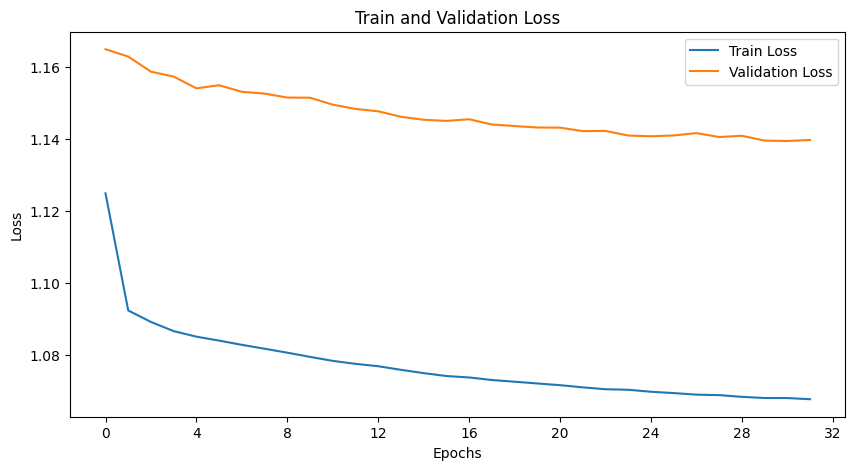

Epoch: 33, Train loss: 1.06735, Val loss: 1.13952, Epoch time = 18.353s


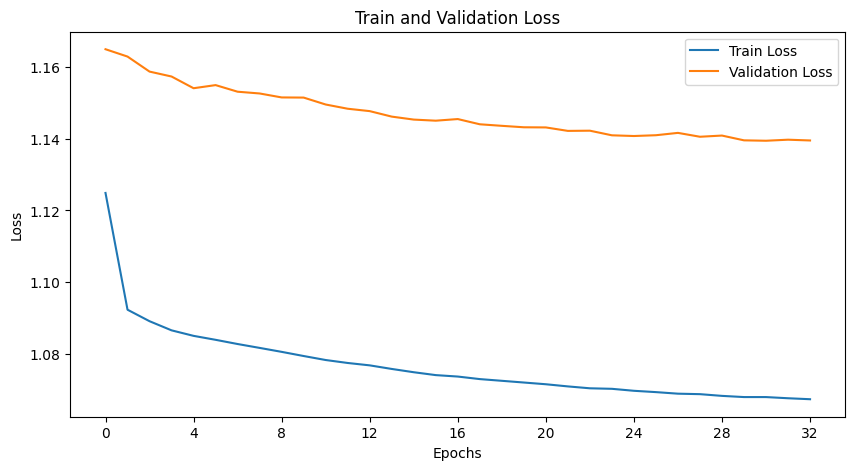

Epoch: 34, Train loss: 1.06678, Val loss: 1.13940, Epoch time = 18.417s


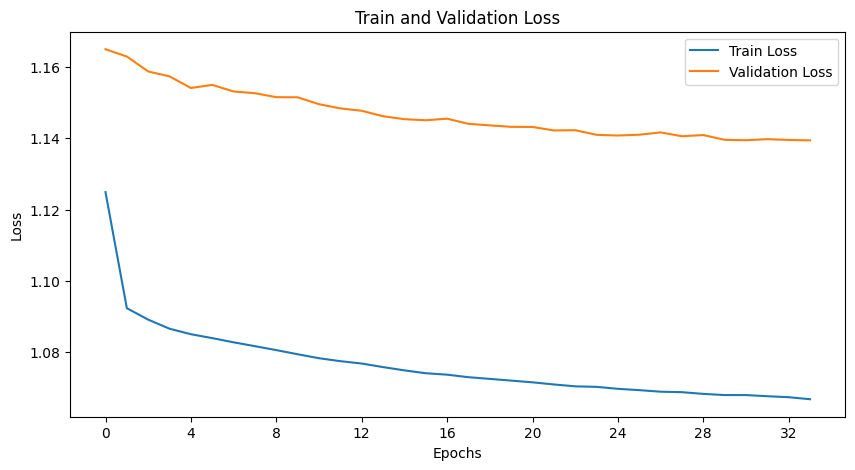

Epoch: 35, Train loss: 1.06642, Val loss: 1.13908, Epoch time = 18.818s


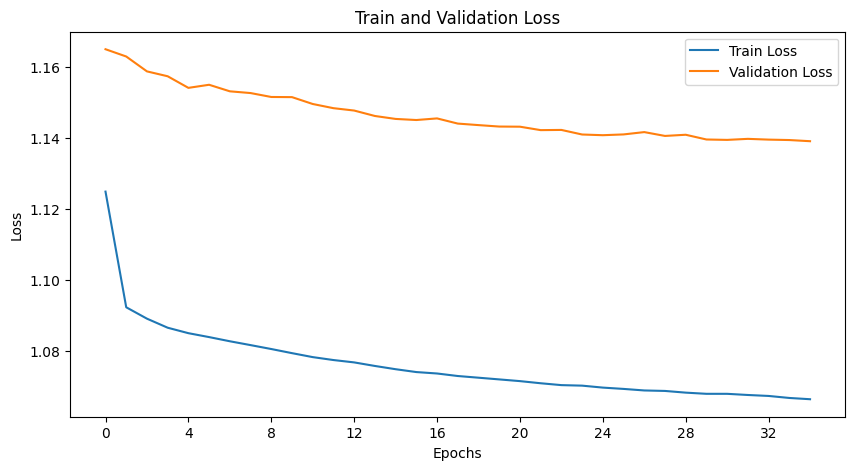

Epoch: 36, Train loss: 1.06652, Val loss: 1.13952, Epoch time = 18.784s


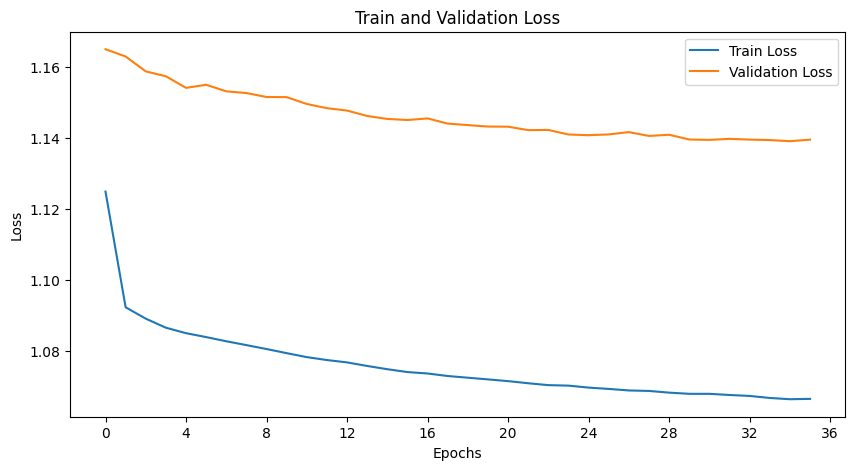

Epoch: 37, Train loss: 1.06615, Val loss: 1.13881, Epoch time = 18.740s


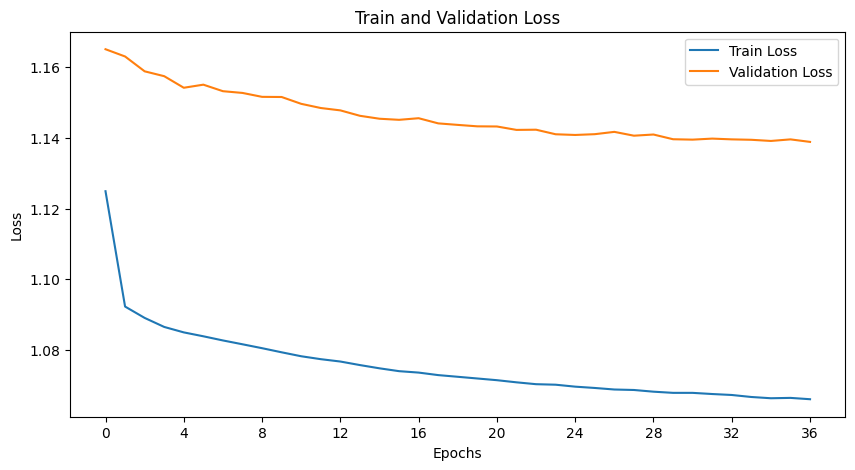

Epoch: 38, Train loss: 1.06610, Val loss: 1.13926, Epoch time = 18.835s


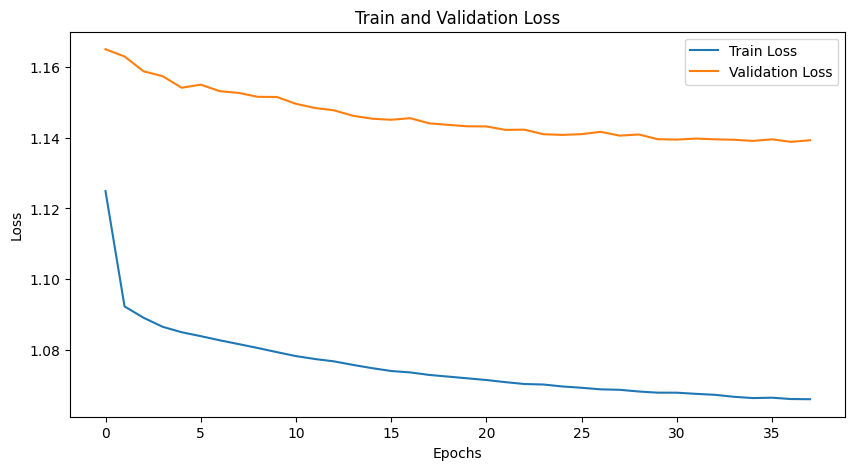

Epoch: 39, Train loss: 1.06581, Val loss: 1.13909, Epoch time = 18.190s


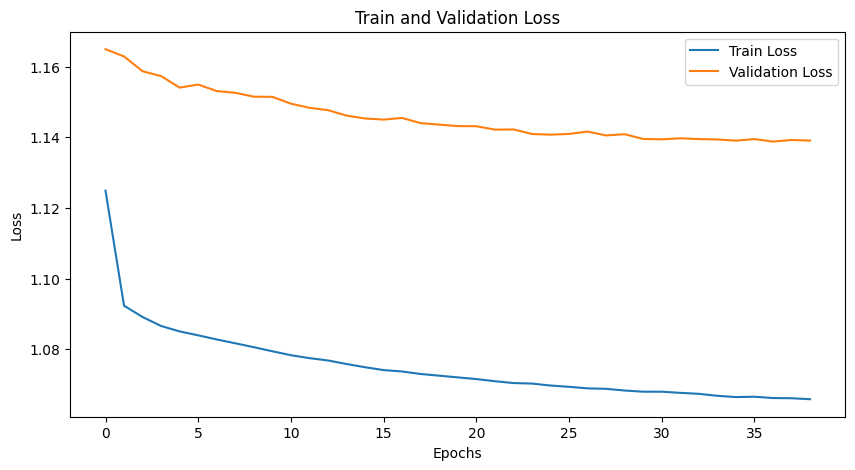

Epoch: 40, Train loss: 1.06578, Val loss: 1.13855, Epoch time = 18.466s


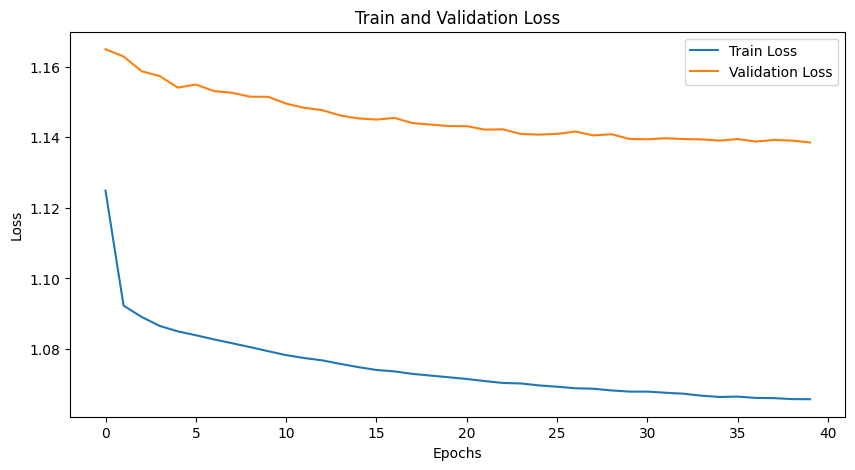

Epoch: 41, Train loss: 1.06561, Val loss: 1.13844, Epoch time = 18.915s


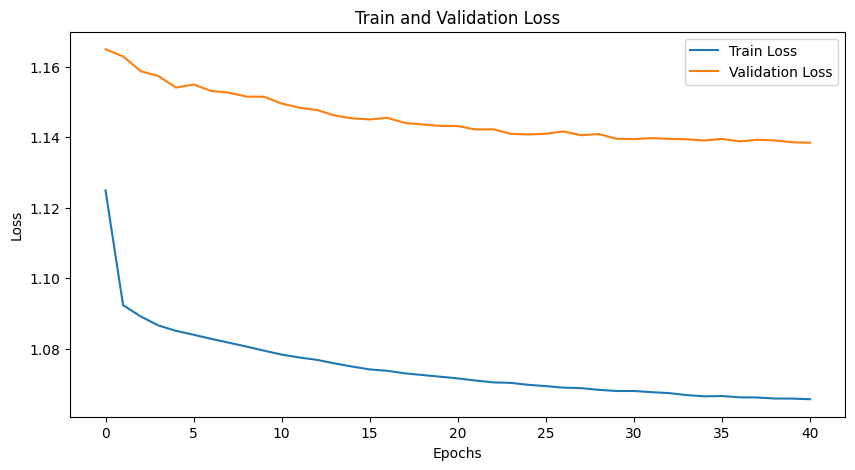

Epoch: 42, Train loss: 1.06523, Val loss: 1.13906, Epoch time = 18.484s


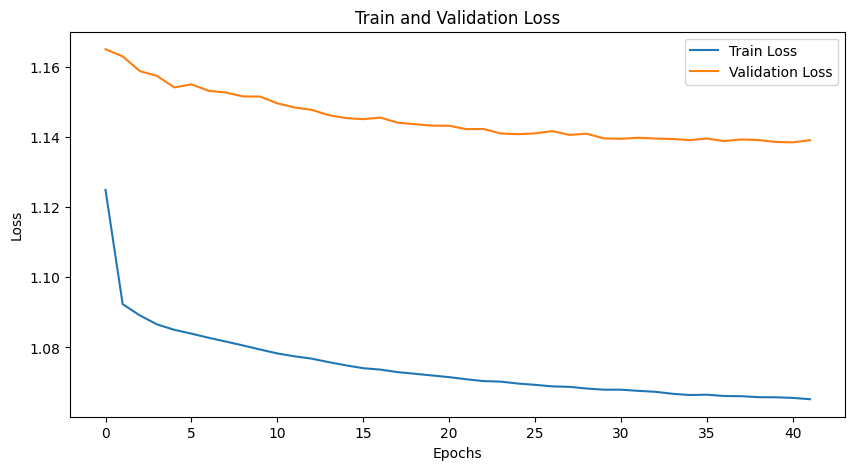

Epoch: 43, Train loss: 1.06482, Val loss: 1.13875, Epoch time = 18.770s


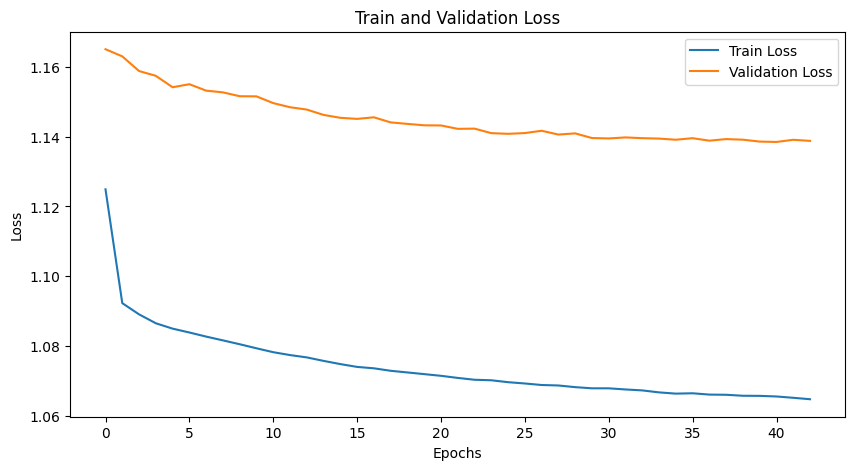

Epoch: 44, Train loss: 1.06464, Val loss: 1.13811, Epoch time = 19.441s


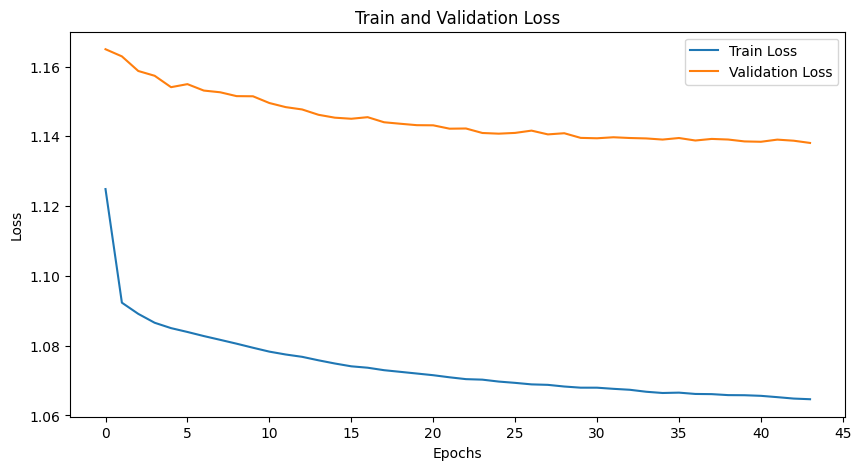

Epoch: 45, Train loss: 1.06459, Val loss: 1.13862, Epoch time = 18.495s


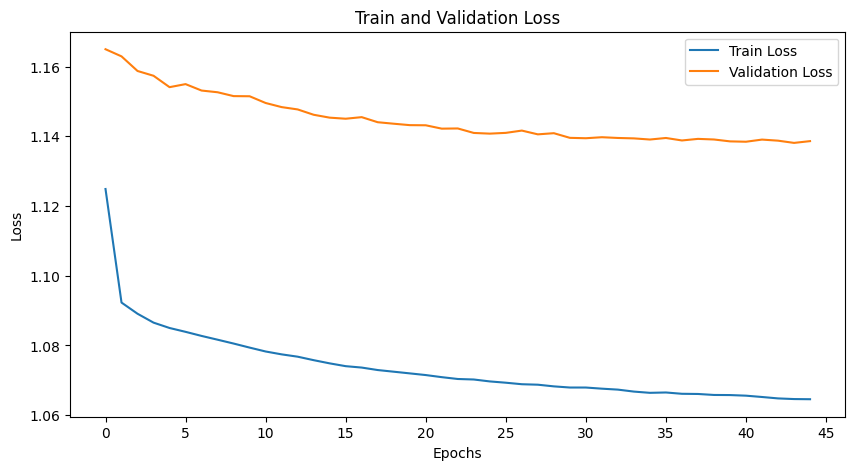

Epoch: 46, Train loss: 1.06422, Val loss: 1.13811, Epoch time = 19.112s


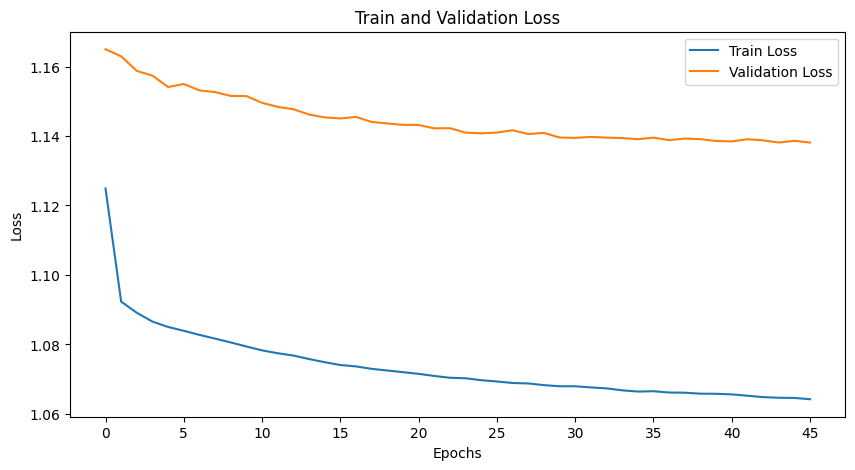

Epoch: 47, Train loss: 1.06434, Val loss: 1.13842, Epoch time = 18.939s


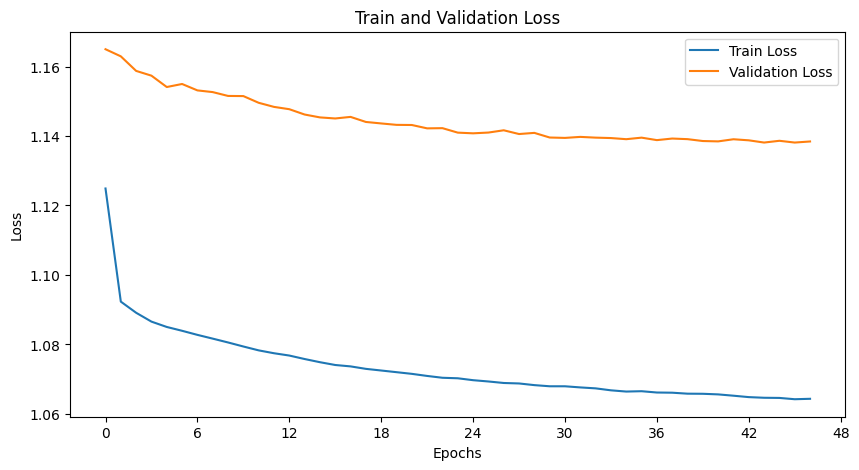

Epoch: 48, Train loss: 1.06395, Val loss: 1.13837, Epoch time = 18.514s


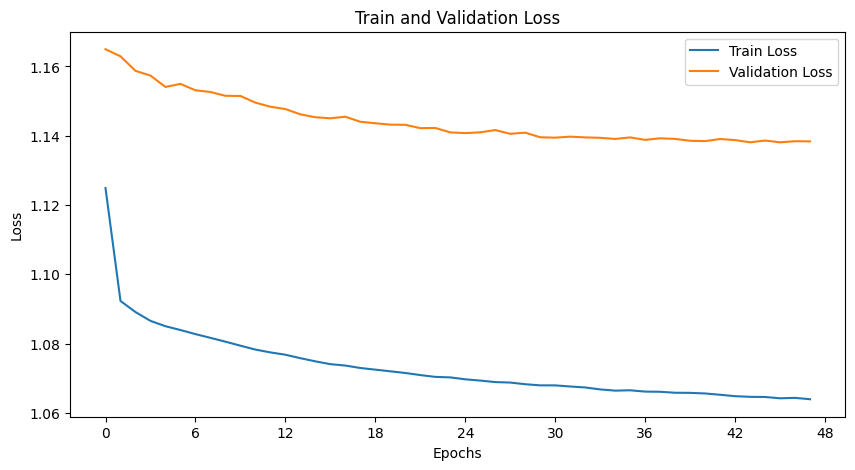

Epoch: 49, Train loss: 1.06381, Val loss: 1.13864, Epoch time = 18.876s


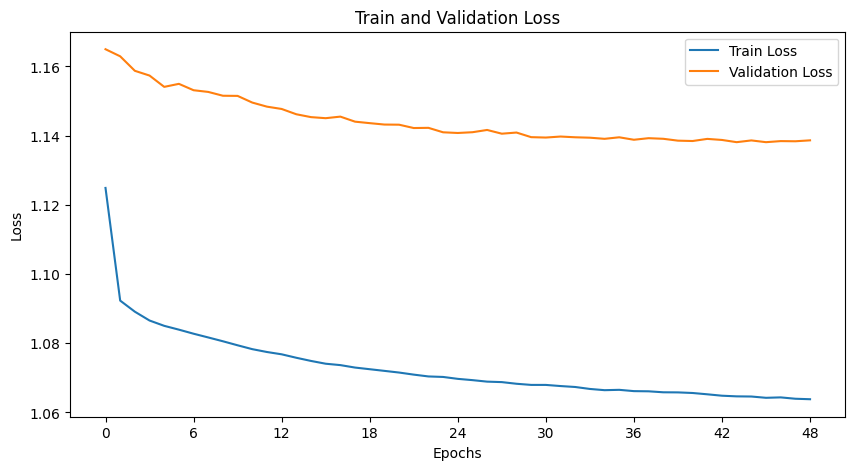

Epoch: 50, Train loss: 1.06347, Val loss: 1.13779, Epoch time = 18.978s


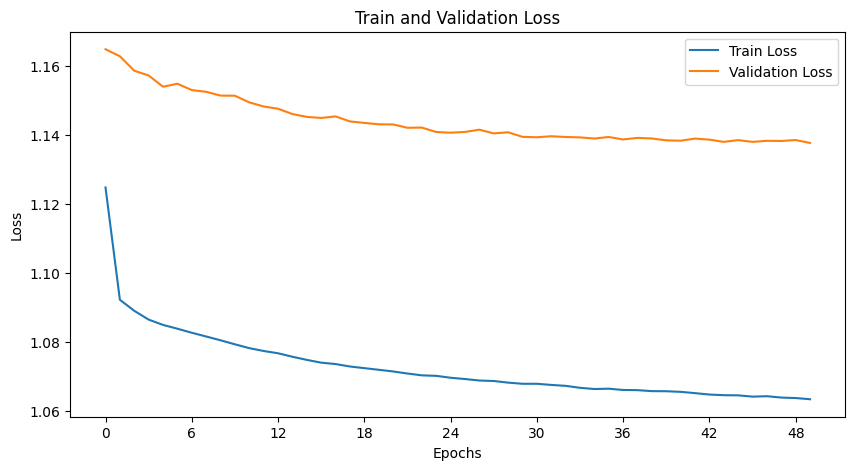

Epoch: 51, Train loss: 1.06357, Val loss: 1.13864, Epoch time = 19.557s


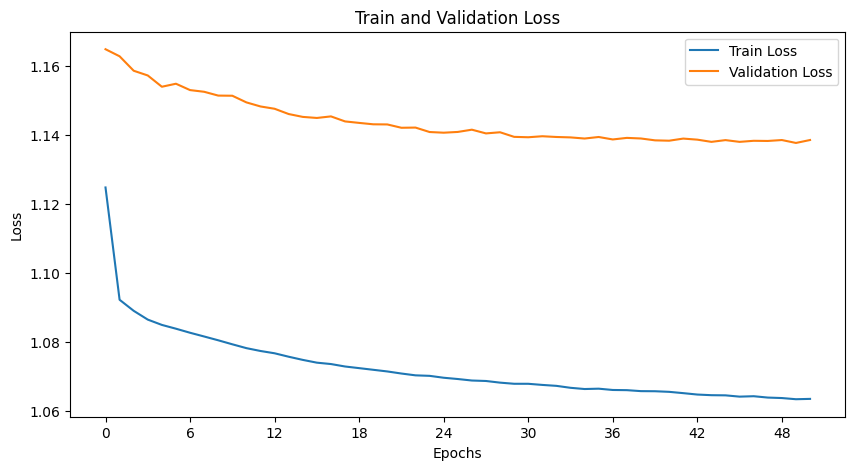

Epoch: 52, Train loss: 1.06336, Val loss: 1.13858, Epoch time = 18.621s


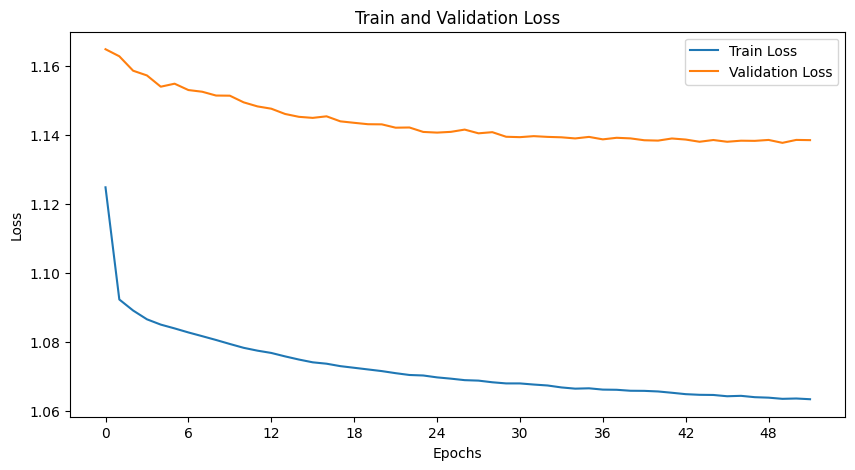

Epoch: 53, Train loss: 1.06331, Val loss: 1.13801, Epoch time = 20.948s


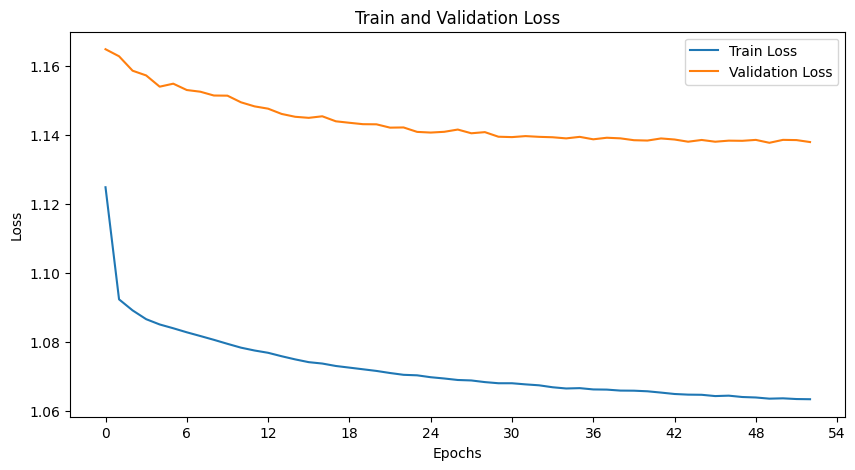

Epoch: 54, Train loss: 1.06313, Val loss: 1.13750, Epoch time = 19.268s


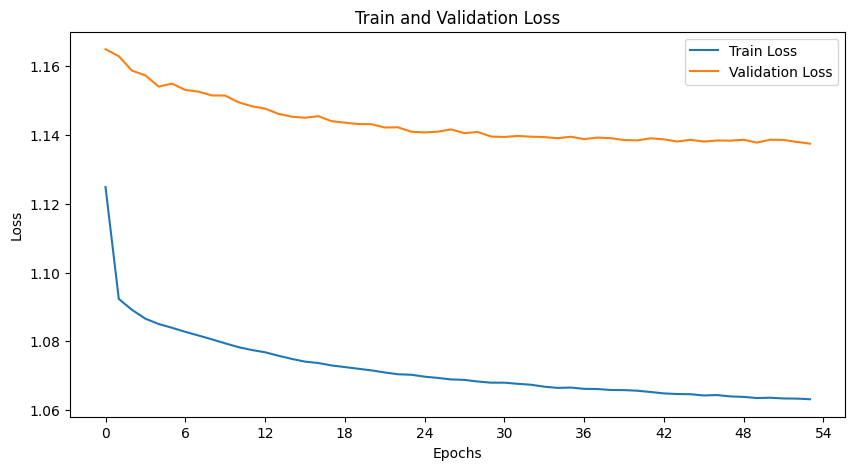

Epoch: 55, Train loss: 1.06276, Val loss: 1.13751, Epoch time = 18.051s


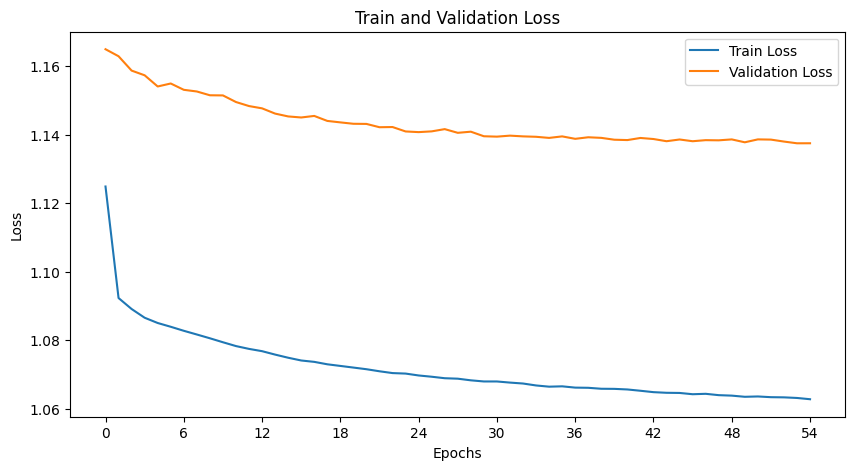

Epoch: 56, Train loss: 1.06267, Val loss: 1.13839, Epoch time = 18.292s


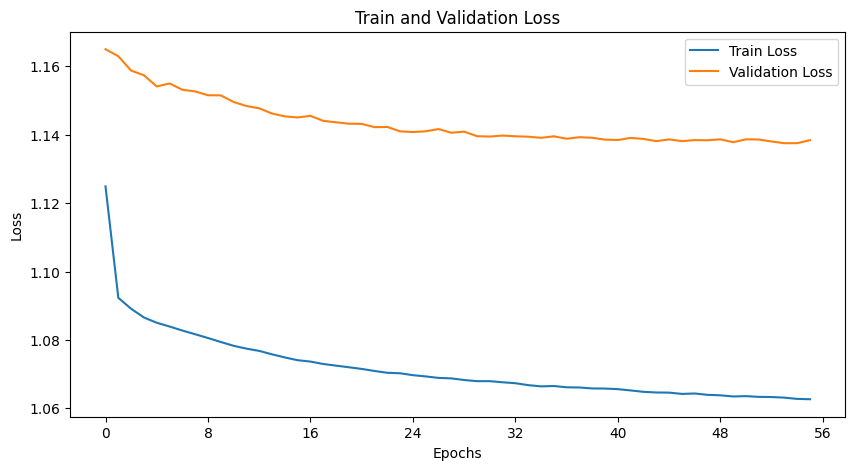

Epoch: 57, Train loss: 1.06260, Val loss: 1.13827, Epoch time = 18.806s


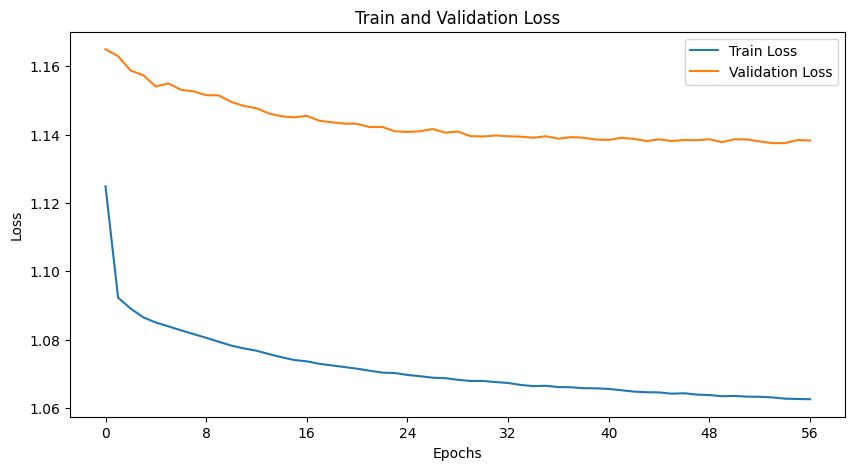

Epoch: 58, Train loss: 1.06213, Val loss: 1.13844, Epoch time = 20.752s


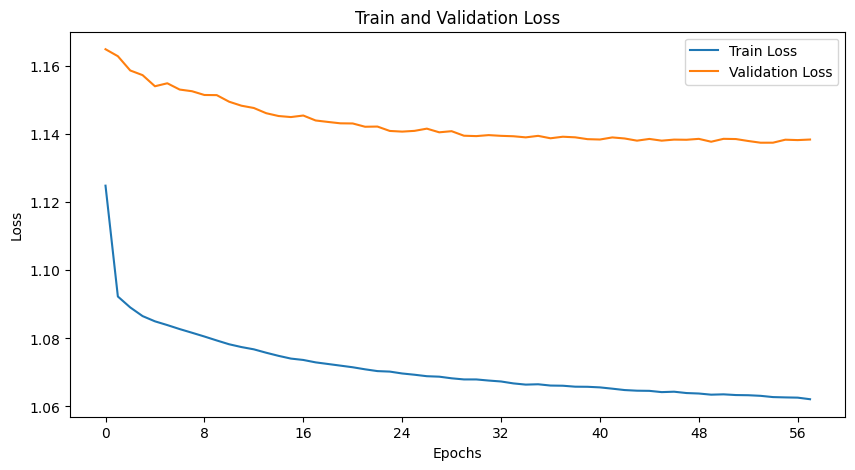

Epoch: 59, Train loss: 1.06210, Val loss: 1.13818, Epoch time = 18.947s


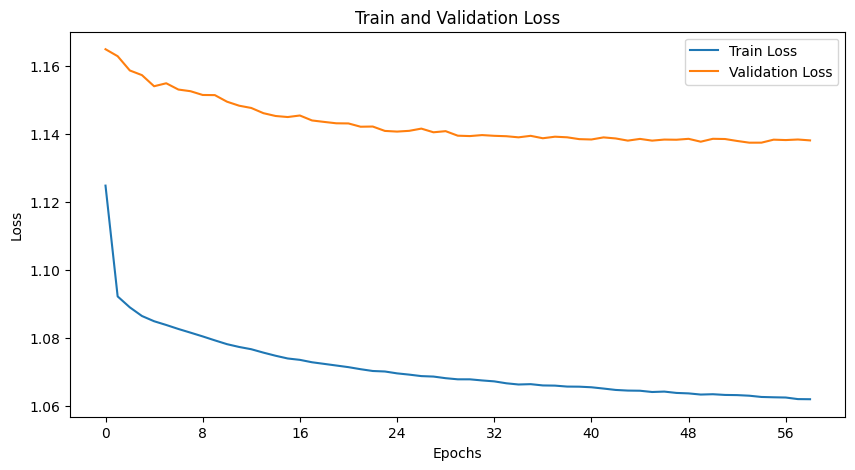

Epoch: 60, Train loss: 1.06204, Val loss: 1.13774, Epoch time = 19.068s


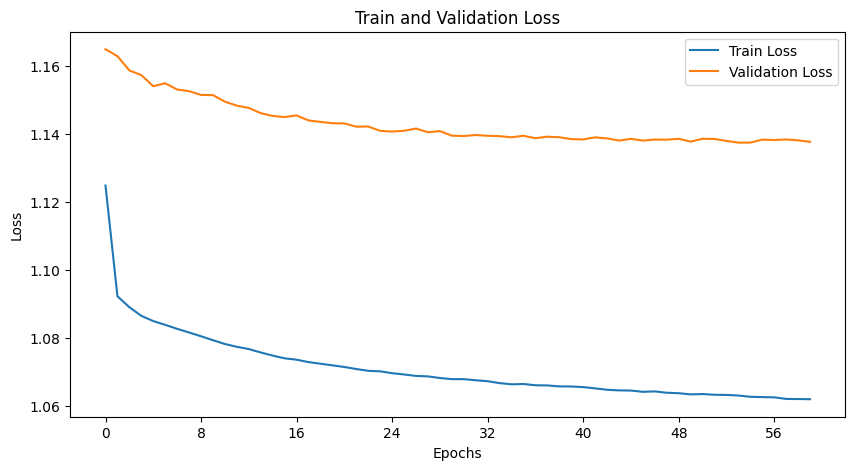

Epoch: 61, Train loss: 1.06170, Val loss: 1.13827, Epoch time = 18.226s


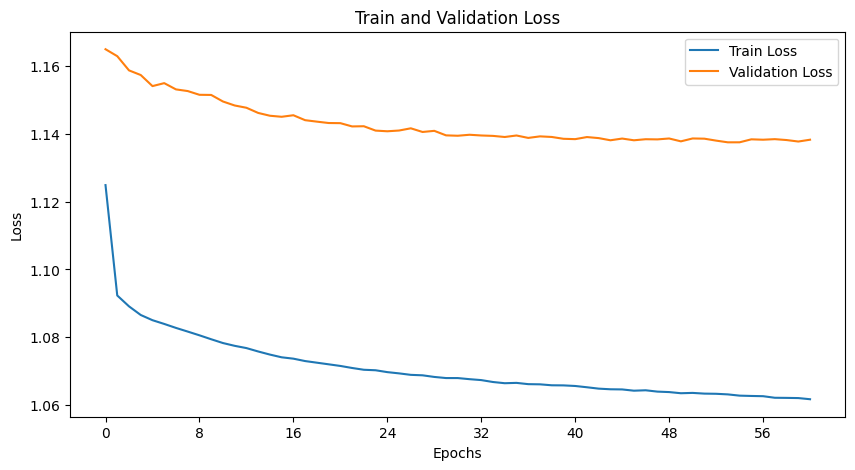

Epoch: 62, Train loss: 1.06188, Val loss: 1.13759, Epoch time = 18.099s


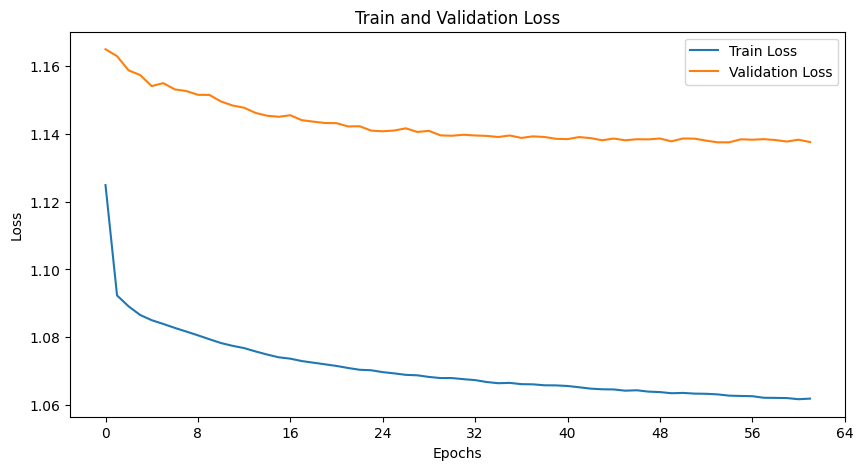

Epoch: 63, Train loss: 1.06121, Val loss: 1.13733, Epoch time = 18.088s


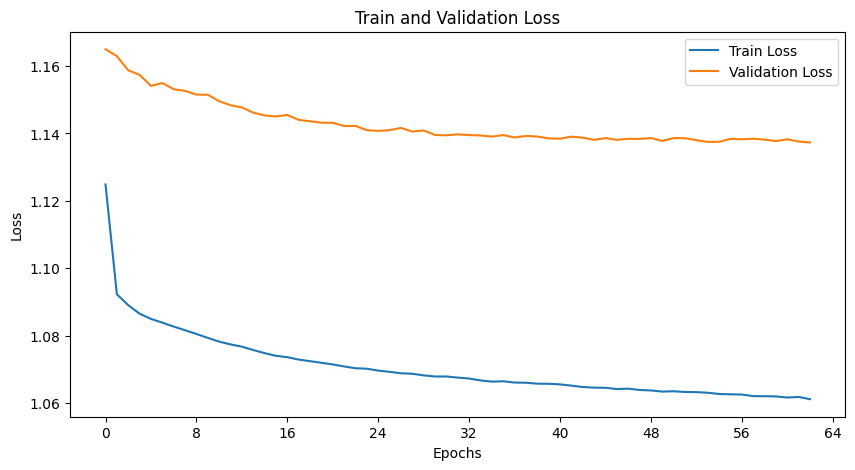

Epoch: 64, Train loss: 1.06128, Val loss: 1.13797, Epoch time = 18.286s


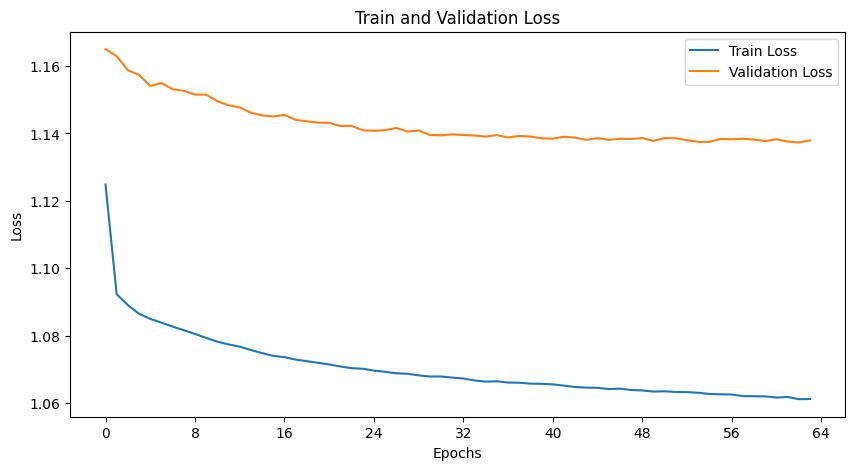

Epoch: 65, Train loss: 1.06121, Val loss: 1.13822, Epoch time = 18.253s


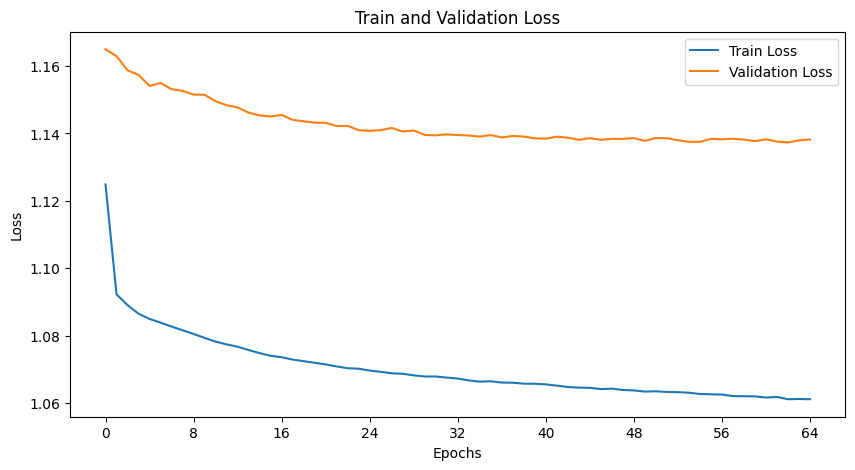

Epoch: 66, Train loss: 1.06094, Val loss: 1.13801, Epoch time = 18.419s


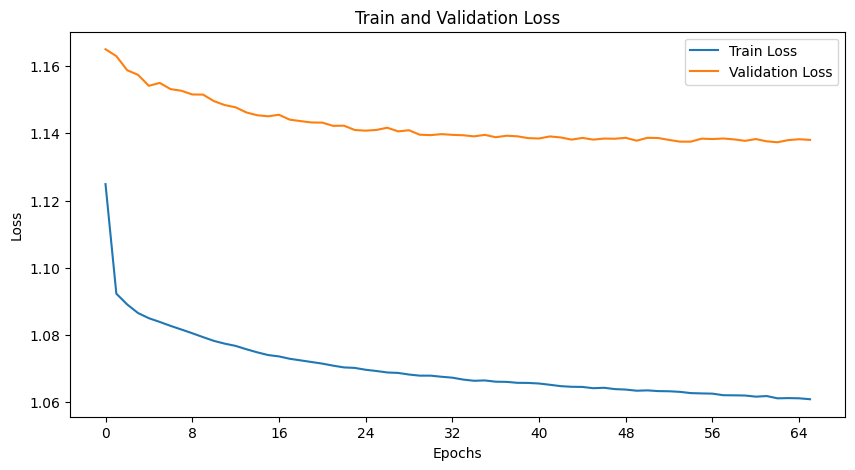

Epoch: 67, Train loss: 1.06088, Val loss: 1.13769, Epoch time = 18.250s


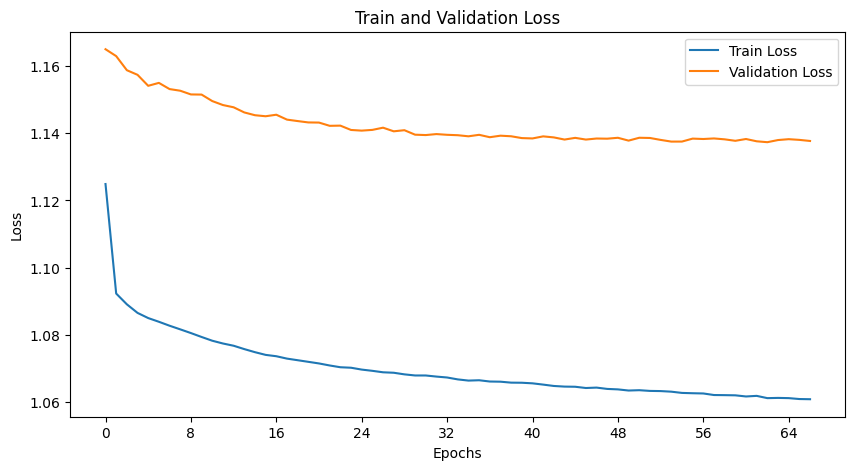

Epoch: 68, Train loss: 1.06066, Val loss: 1.13761, Epoch time = 18.984s


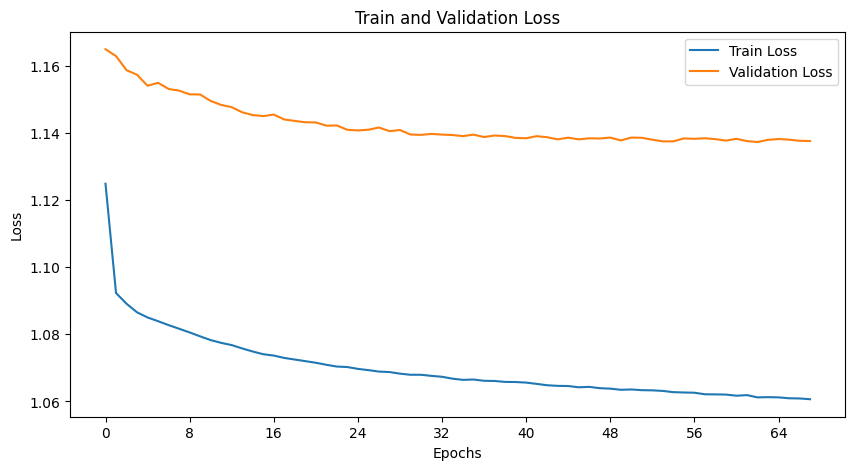

Epoch: 69, Train loss: 1.06054, Val loss: 1.13735, Epoch time = 18.793s


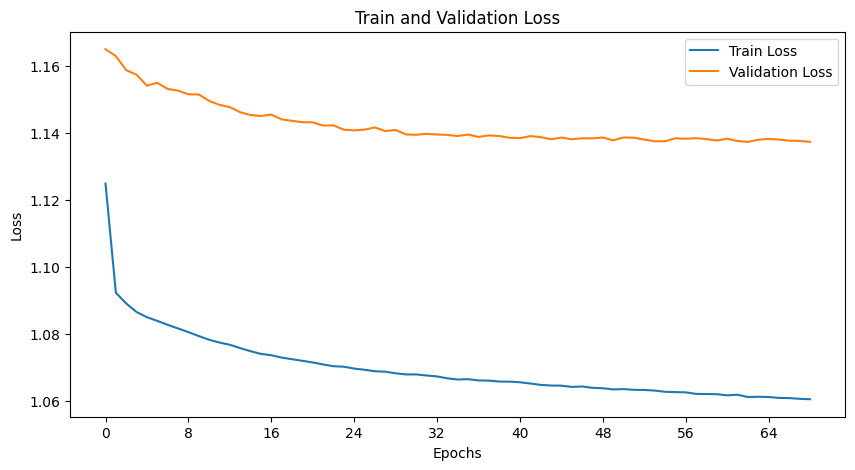

Epoch: 70, Train loss: 1.06047, Val loss: 1.13793, Epoch time = 18.356s


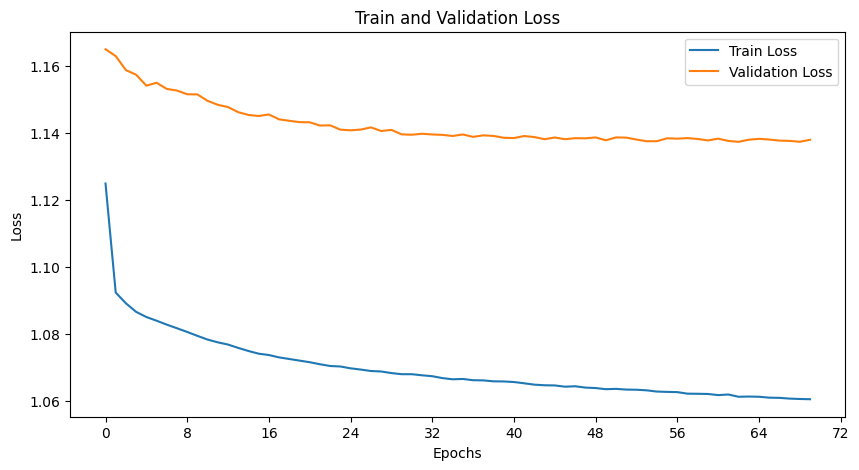

Epoch: 71, Train loss: 1.06023, Val loss: 1.13791, Epoch time = 18.152s


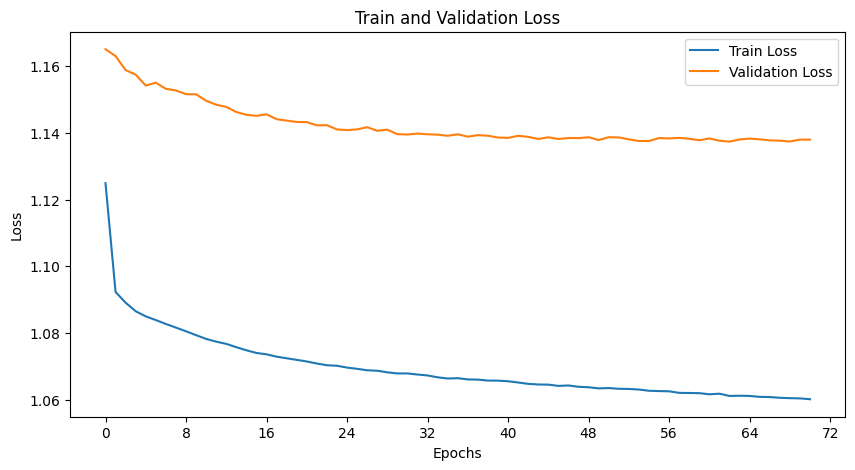

Epoch: 72, Train loss: 1.05996, Val loss: 1.13841, Epoch time = 18.865s


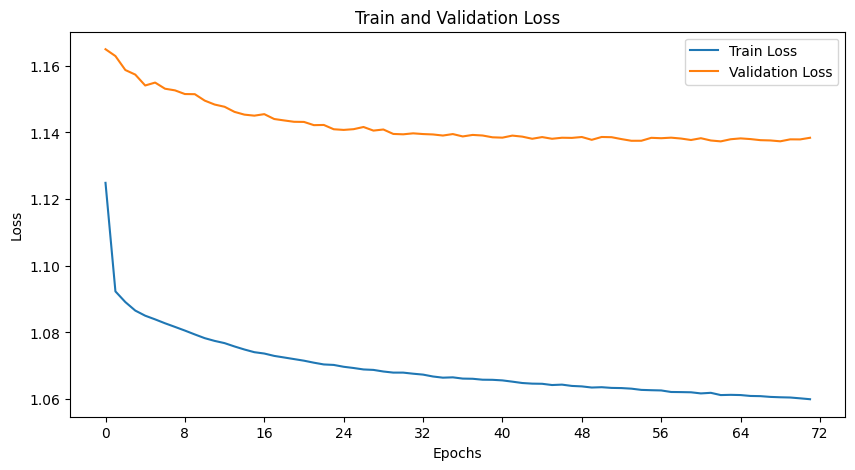

Epoch: 73, Train loss: 1.05983, Val loss: 1.13793, Epoch time = 18.262s


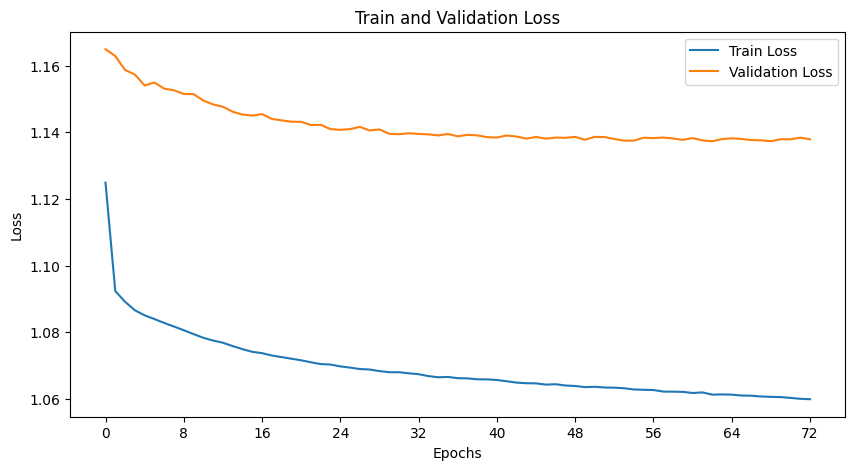

Epoch: 74, Train loss: 1.05986, Val loss: 1.13795, Epoch time = 18.105s


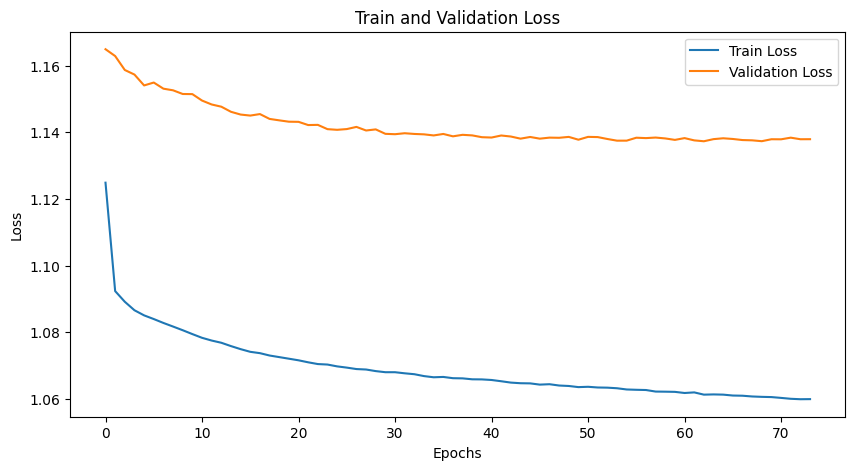

Epoch: 75, Train loss: 1.05970, Val loss: 1.13809, Epoch time = 18.350s


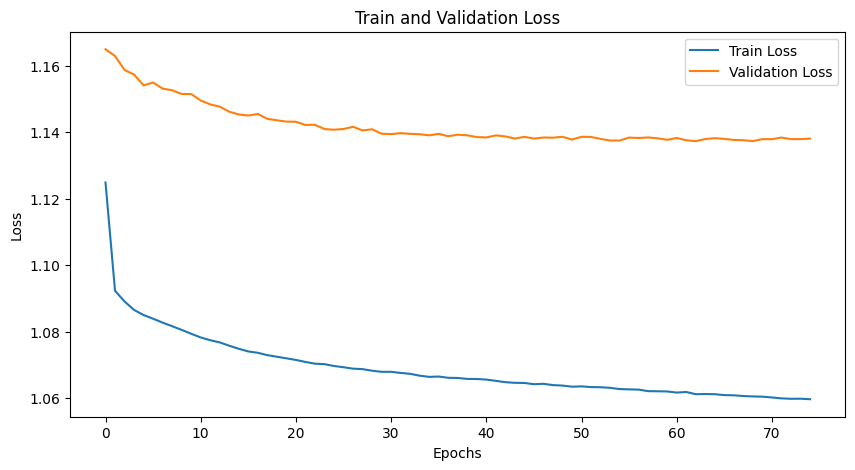

Epoch: 76, Train loss: 1.05969, Val loss: 1.13774, Epoch time = 18.664s


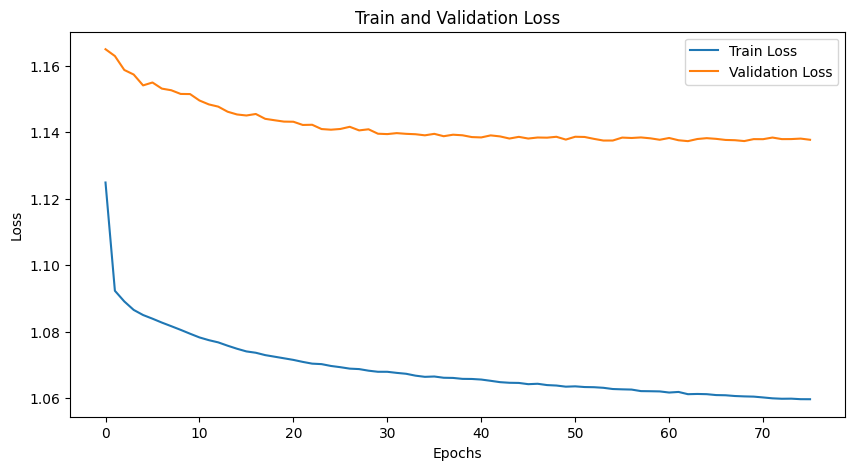

Epoch: 77, Train loss: 1.05963, Val loss: 1.13799, Epoch time = 18.453s


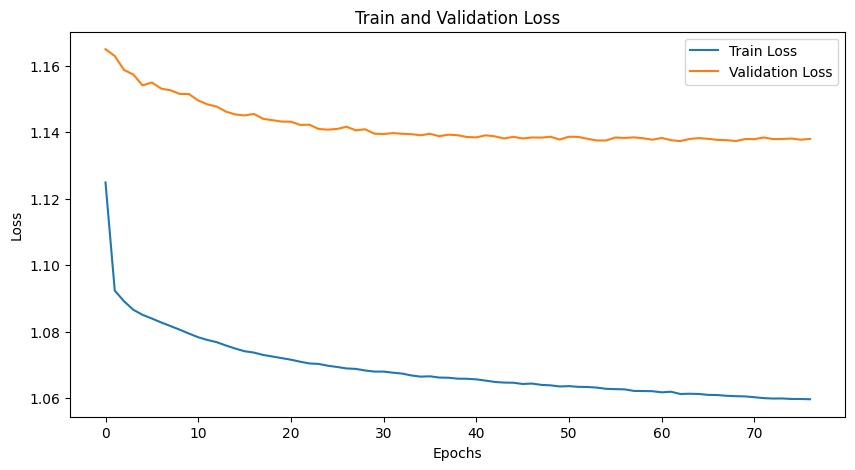

Epoch: 78, Train loss: 1.05895, Val loss: 1.13869, Epoch time = 18.792s


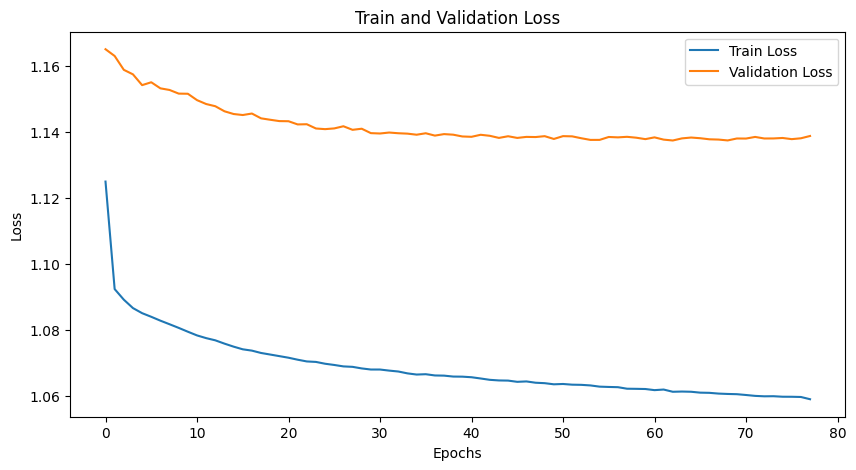

Epoch: 79, Train loss: 1.05919, Val loss: 1.13741, Epoch time = 18.344s


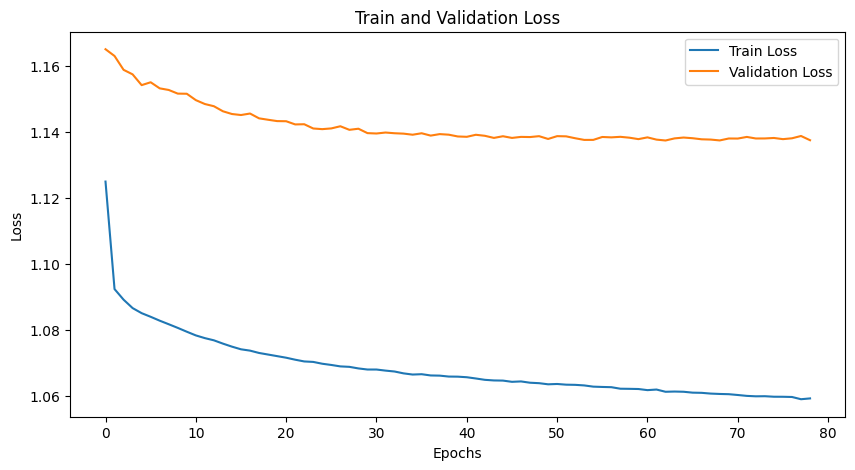

Epoch: 80, Train loss: 1.05904, Val loss: 1.13764, Epoch time = 18.795s


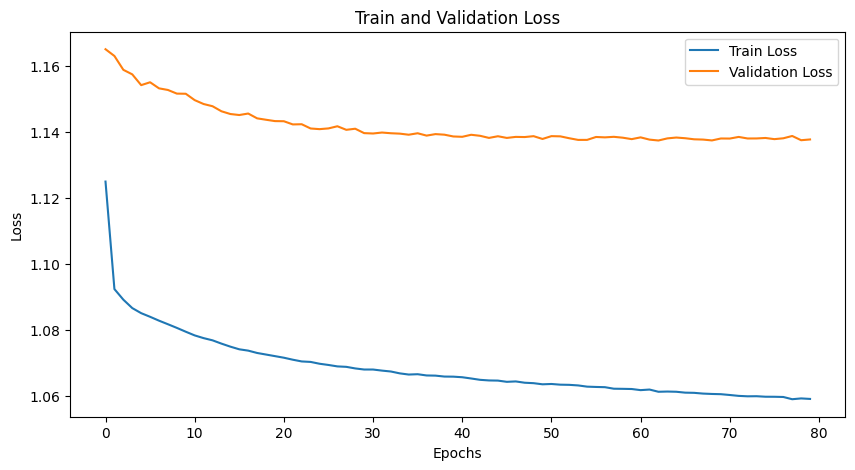

Epoch: 81, Train loss: 1.05900, Val loss: 1.13847, Epoch time = 18.605s


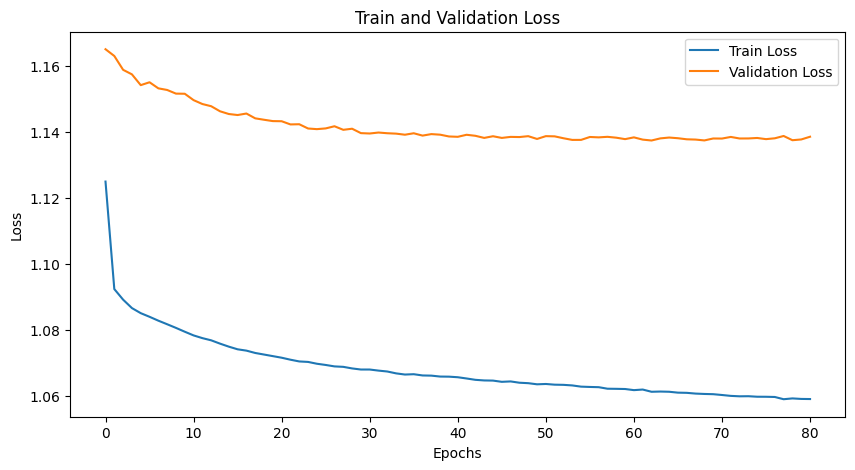

Epoch: 82, Train loss: 1.05877, Val loss: 1.13826, Epoch time = 18.579s


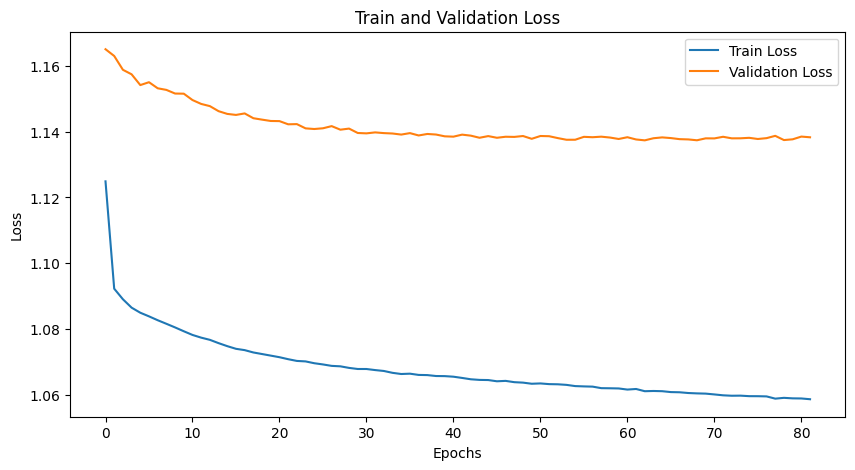

Epoch: 83, Train loss: 1.05857, Val loss: 1.13839, Epoch time = 20.471s


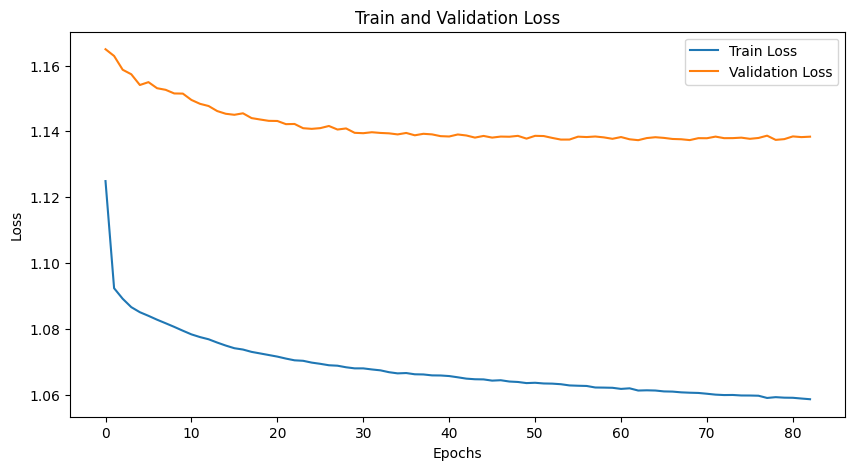

Epoch: 84, Train loss: 1.05850, Val loss: 1.13839, Epoch time = 18.659s


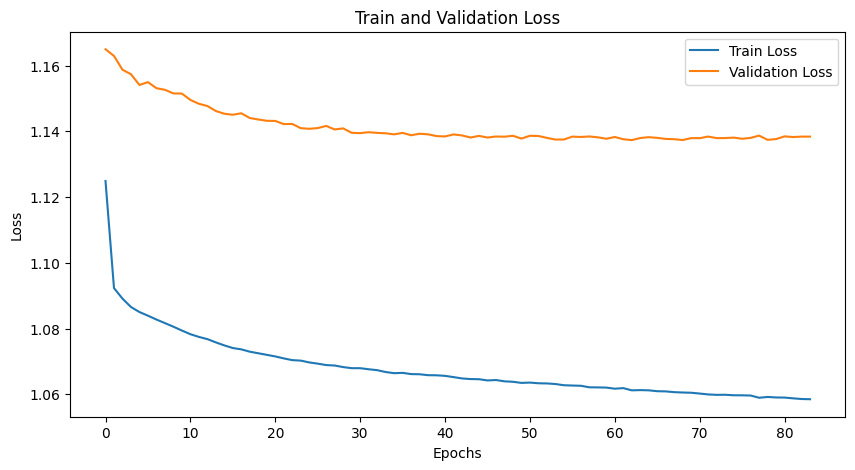

Epoch: 85, Train loss: 1.05818, Val loss: 1.13765, Epoch time = 19.289s


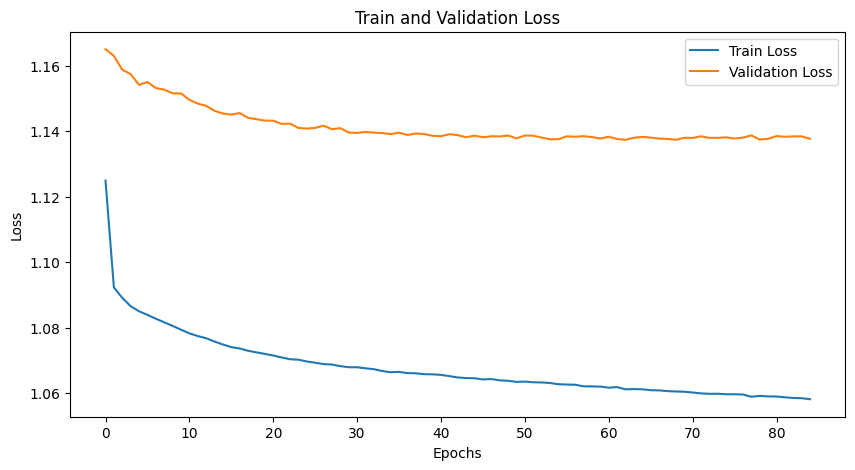

Epoch: 86, Train loss: 1.05810, Val loss: 1.13823, Epoch time = 18.892s


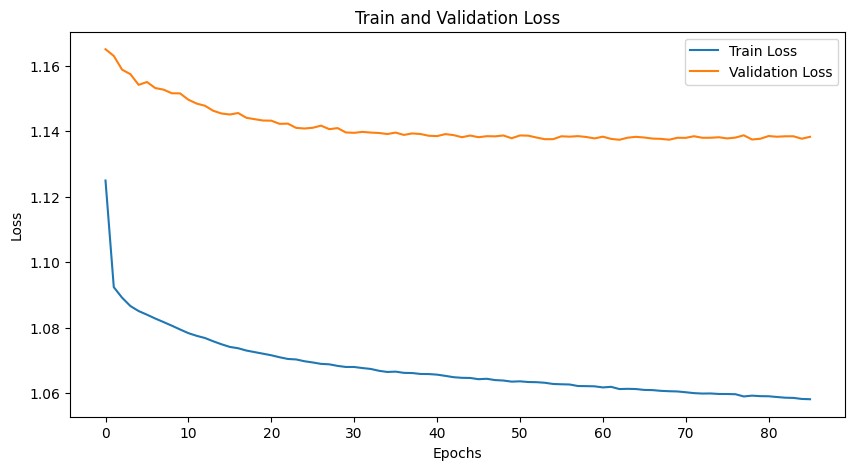

Epoch: 87, Train loss: 1.05798, Val loss: 1.13856, Epoch time = 18.957s


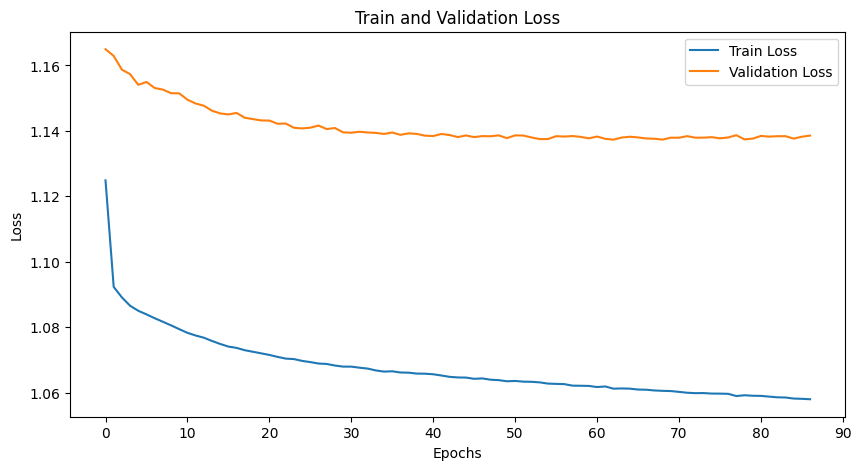

Epoch: 88, Train loss: 1.05783, Val loss: 1.13854, Epoch time = 19.794s


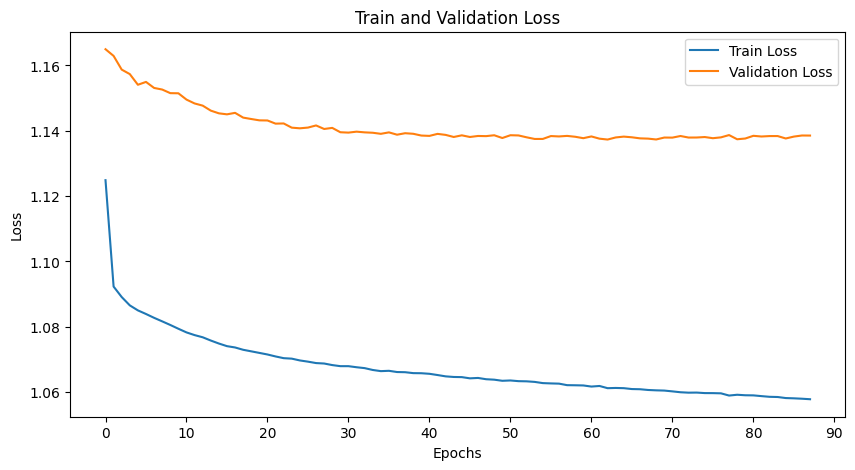

Training:  62%|██████▏   | 350/564 [00:11<00:06, 30.80it/s]

KeyboardInterrupt: 

In [3]:
config = helper.create_json_template()

# Set model project name (for directory name)
config["model_project_name"] = "transformer_3.1"

# Set model parameters
config["model_params"]["num_emb"] = 24
config["model_params"]["hidden_size"] = 256
config["model_params"]["num_layers"] = 4
config["model_params"]["num_heads"] = 4
# config["model_params"]["output_dim"] = 10  can be set optionally

# Set training parameters
config["training_params"]["learning_rate"] = 0.0001
config["training_params"]["num_epochs"] = 200
config["training_params"]["optimizer"] = "Adam"
config["training_params"]["loss_fn"] = "MusicTheoryLoss"
config["training_params"]["loss_fn_parameters"]["alpha"] = 1
config["training_params"]["loss_fn_parameters"]["gamma"] = 1

# Set training data parameters
config["training_data_params"]["sos_token"] = [[1] * 24]
config["training_data_params"]["pad_token"] = [[2] * 24]
config["training_data_params"]["snapshot_interval"] = 0.05
config["training_data_params"]["batch_size"] = 32
config["training_data_params"]["sequence_length"] = 512
config["training_data_params"]["stride"] = 256
config["training_data_params"]["test_size"] = 0.1

config_path = helper.save_json_config(config, projects_path)

helper.train_model_from_config(str(config_path), dataset_dir, device)